<a href="https://colab.research.google.com/github/tailornishant/Smart_Meter/blob/main/Smart_Meter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Purpose of Project

- What do you think, How many kWh of Energy your house would be consuming everyday???
- How much Energy is consumed by different appliances in your house??
- Does weather condition affect the energy consumption?
- Are your Appliances working well or there is any fault in it??
- Which day of a week you require maximum and minimum energy??
- Which Time Period of a Day utilises maximum and minimum energy??

- **To answer all of the above question we can perform Data Analysis and apply Machine Learning Algorithms**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## About Dataset

- We have got the readings with a time span of 1 minute OF 350 DAYS of house appliances in kW from a smart meter and weather conditions of that particular region.

### Weather information understanding
- In order to utilize weather information data, we need to understand what each weather information means actually.
 
**temperature**
- physical quantity expressing hot and cold

**humidity**
- concentration of water vapour present in air

**visibility**
- meteorological optical range which is defined as the length of atmosphere over which a beam of light travels before its luminous flux is reduced to 5% of its original value

**apparentTemperature**
- temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed

**pressure**
- Falling air pressure indicates that bad weather is coming, while rising air pressure indicates good weather

**windSpeed**
- fundamental atmospheric quantity caused by air moving from high to low pressure, usually due to changes in temperature

**cloudCover**
- fraction of the sky obscured by clouds when observed from a particular location

**windBearing**
- In meteorology, an azimuth of 000° is used only when no wind is blowing, while 360° means the wind is from the North. True Wind Direction True North is represented on a globe as the North Pole. All directions relative to True North may be called "true bearings."

**dewPoint**
- the atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form

**precipProbability**
- measure of the probability that at least some minimum quantity of precipitation will occur within a specified forecast period and location

**precipIntensity**
- measure of the amount of rain that falls over time

In [ ]:
# Let's Import Required Libraries
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set(style="whitegrid", color_codes=True)

# import keras and other libraries for Neural Network
from tensorflow import keras
from tensorflow.keras import layers

# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam 

%matplotlib inline

In [ ]:
# load the csv file
home = pd.read_csv('/content/drive/MyDrive/Dataset/Smart_meter/HomeC.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Visualizing the DataFrame
home

time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0       1451624400  0.932833  0.003483            0.932833         0.000033   
1       1451624401  0.934333  0.003467            0.934333         0.000000   
2       1451624402  0.931817  0.003467            0.931817         0.000017   
3       1451624403  1.022050  0.003483            1.022050         0.000017   
4       1451624404  1.139400  0.003467            1.139400         0.000133   
...            ...       ...       ...                 ...              ...   
503906  1452128306  1.599333  0.003233            1.599333         0.000050   
503907  1452128307  1.924267  0.003217            1.924267         0.000033   
503908  1452128308  1.978200  0.003217            1.978200         0.000050   
503909  1452128309  1.990950  0.003233            1.990950         0.000050   
503910           \       NaN       NaN                 NaN              NaN   

        Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0             0.020700        0.061917          0.442633     0.124150   
1             0.020717        0.063817          0.444067     0.124000   
2             0.020700        0.062317          0.446067     0.123533   
3             0.106900        0.068517          0.446583     0.123133   
4             0.236933        0.063983          0.446533     0.122850   
...                ...             ...               ...          ...   
503906        0.104017        0.625033          0.041750     0.005233   
503907        0.422383        0.637733          0.042033     0.004983   
503908        0.495667        0.620367          0.042100     0.005333   
503909        0.494700        0.634133          0.042100     0.004917   
503910             NaN             NaN               NaN          NaN   

        Wine cellar [kW]  ...  visibility     summary  apparentTemperature  \
0               0.006983  ...       10.00       Clear                29.26   
1               0.006983  ...       10.00       Clear                29.26   
2               0.006983  ...       10.00       Clear                29.26   
3               0.006983  ...       10.00       Clear                29.26   
4               0.006850  ...       10.00       Clear                29.26   
...                  ...  ...         ...         ...                  ...   
503906          0.008433  ...        8.74  Light Rain                29.45   
503907          0.008467  ...        8.74  Light Rain                29.45   
503908          0.008233  ...        8.74  Light Rain                29.45   
503909          0.008133  ...        8.74  Light Rain                29.45   
503910               NaN  ...         NaN         NaN                  NaN   

        pressure  windSpeed  cloudCover  windBearing  precipIntensity  \
0        1016.91       9.18  cloudCover        282.0           0.0000   
1        1016.91       9.18  cloudCover        282.0           0.0000   
2        1016.91       9.18  cloudCover        282.0           0.0000   
3        1016.91       9.18  cloudCover        282.0           0.0000   
4        1016.91       9.18  cloudCover        282.0           0.0000   
...          ...        ...         ...          ...              ...   
503906   1011.49       6.72        0.31        186.0           0.0101   
503907   1011.49       6.72        0.31        186.0           0.0101   
503908   1011.49       6.72        0.31        186.0           0.0101   
503909   1011.49       6.72        0.31        186.0           0.0101   
503910       NaN        NaN         NaN          NaN              NaN   

        dewPoint  precipProbability  
0          24.40               0.00  
1          24.40               0.00  
2          24.40               0.00  
3          24.40               0.00  
4          24.40               0.00  
...          ...                ...  
503906     31.27               0.51  
503907     31.27               0.51  
503908     31.27               0

In [ ]:
# Checking for the null values
home.isna().sum()

time                   0
use [kW]               1
gen [kW]               1
House overall [kW]     1
Dishwasher [kW]        1
Furnace 1 [kW]         1
Furnace 2 [kW]         1
Home office [kW]       1
Fridge [kW]            1
Wine cellar [kW]       1
Garage door [kW]       1
Kitchen 12 [kW]        1
Kitchen 14 [kW]        1
Kitchen 38 [kW]        1
Barn [kW]              1
Well [kW]              1
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64

##### From this we can say that only last row is having null value so, we can remove that.
##### Also, as we know that readings are noted at timespan of 1 min for 350 days so, time column is time stamp after 1 min

In [ ]:
# Understand the dataset in a better way
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

##### From this we get that icon,time, summary and cloudcover is object datatype and restall are float.

In [ ]:
# Droping Nan
home = home[0:-1]

In [ ]:
# Looking at the time column we can clearly say that it is unix time column with unit as 's'
pd.to_datetime(home['time'], unit='s').head(3)

0   2016-01-01 05:00:00
1   2016-01-01 05:00:01
2   2016-01-01 05:00:02
Name: time, dtype: datetime64[ns]

In [ ]:
# Now as we know that provided timestamp is at every 1 min interval so, need to convert that using date_range
home['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(home),  freq='min'))
home.head(3)

<ipython-input-9-1898a8ee4158>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(home),  freq='min'))


time  use [kW]  gen [kW]  House overall [kW]  \
0 2016-01-01 05:00:00  0.932833  0.003483            0.932833   
1 2016-01-01 05:01:00  0.934333  0.003467            0.934333   
2 2016-01-01 05:02:00  0.931817  0.003467            0.931817   

   Dishwasher [kW]  Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  \
0         0.000033        0.020700        0.061917          0.442633   
1         0.000000        0.020717        0.063817          0.444067   
2         0.000017        0.020700        0.062317          0.446067   

   Fridge [kW]  Wine cellar [kW]  ...  visibility  summary  \
0     0.124150          0.006983  ...        10.0    Clear   
1     0.124000          0.006983  ...        10.0    Clear   
2     0.123533          0.006983  ...        10.0    Clear   

   apparentTemperature  pressure  windSpeed  cloudCover  windBearing  \
0                29.26   1016.91       9.18  cloudCover        282.0   
1                29.26   1016.91       9.18  cloudCover        282.0   
2                29.26   1016.91       9.18  cloudCover        282.0   

   precipIntensity  dewPoint  precipProbability  
0              0.0      24.4                0.0  
1              0.0      24.4                0.0  
2              0.0      24.4                0.0  

[3 rows x 32 columns]

In [ ]:
# For the Purpose of analysis/ Feature Engineering purpose we need week of the day, month and hour of the day
home['weekday'] = home['time'].apply(lambda x : x.day_name())
home['month'] = home['time'].apply(lambda x : x.month)
home['hour'] = home['time'].apply(lambda x : x.hour)
home.head(3)

<ipython-input-10-7d5f292f76b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['weekday'] = home['time'].apply(lambda x : x.day_name())
<ipython-input-10-7d5f292f76b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['month'] = home['time'].apply(lambda x : x.month)
<ipython-input-10-7d5f292f76b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

time  use [kW]  gen [kW]  House overall [kW]  \
0 2016-01-01 05:00:00  0.932833  0.003483            0.932833   
1 2016-01-01 05:01:00  0.934333  0.003467            0.934333   
2 2016-01-01 05:02:00  0.931817  0.003467            0.931817   

   Dishwasher [kW]  Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  \
0         0.000033        0.020700        0.061917          0.442633   
1         0.000000        0.020717        0.063817          0.444067   
2         0.000017        0.020700        0.062317          0.446067   

   Fridge [kW]  Wine cellar [kW]  ...  pressure  windSpeed  cloudCover  \
0     0.124150          0.006983  ...   1016.91       9.18  cloudCover   
1     0.124000          0.006983  ...   1016.91       9.18  cloudCover   
2     0.123533          0.006983  ...   1016.91       9.18  cloudCover   

   windBearing  precipIntensity  dewPoint  precipProbability  weekday  month  \
0        282.0              0.0      24.4                0.0   Friday      1   
1        282.0              0.0      24.4                0.0   Friday      1   
2        282.0              0.0      24.4                0.0   Friday      1   

   hour  
0     5  
1     5  
2     5  

[3 rows x 35 columns]

In [ ]:
home.tail(3)

time  use [kW]  gen [kW]  House overall [kW]  \
503907 2016-12-16 03:27:00  1.924267  0.003217            1.924267   
503908 2016-12-16 03:28:00  1.978200  0.003217            1.978200   
503909 2016-12-16 03:29:00  1.990950  0.003233            1.990950   

        Dishwasher [kW]  Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  \
503907         0.000033        0.422383        0.637733          0.042033   
503908         0.000050        0.495667        0.620367          0.042100   
503909         0.000050        0.494700        0.634133          0.042100   

        Fridge [kW]  Wine cellar [kW]  ...  pressure  windSpeed  cloudCover  \
503907     0.004983          0.008467  ...   1011.49       6.72        0.31   
503908     0.005333          0.008233  ...   1011.49       6.72        0.31   
503909     0.004917          0.008133  ...   1011.49       6.72        0.31   

        windBearing  precipIntensity  dewPoint  precipProbability  weekday  \
503907        186.0           0.0101     31.27               0.51   Friday   
503908        186.0           0.0101     31.27               0.51   Friday   
503909        186.0           0.0101     31.27               0.51   Friday   

        month  hour  
503907     12     3  
503908     12     3  
503909     12     3  

[3 rows x 35 columns]

In [ ]:
home.describe()

use [kW]       gen [kW]  House overall [kW]  Dishwasher [kW]  \
count  503910.000000  503910.000000       503910.000000    503910.000000   
mean        0.858962       0.076229            0.858962         0.031368   
std         1.058207       0.128428            1.058207         0.190951   
min         0.000000       0.000000            0.000000         0.000000   
25%         0.367667       0.003367            0.367667         0.000000   
50%         0.562333       0.004283            0.562333         0.000017   
75%         0.970250       0.083917            0.970250         0.000233   
max        14.714567       0.613883           14.714567         1.401767   

       Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]    Fridge [kW]  \
count   503910.000000   503910.000000     503910.000000  503910.000000   
mean         0.099210        0.136779          0.081287       0.063556   
std          0.169059        0.178631          0.104466       0.076199   
min          0.000017        0.000067          0.000083       0.000067   
25%          0.020233        0.064400          0.040383       0.005083   
50%          0.020617        0.066633          0.042217       0.005433   
75%          0.068733        0.080633          0.068283       0.125417   
max          1.934083        0.794933          0.971750       0.851267   

       Wine cellar [kW]  Garage door [kW]  ...     visibility  \
count     503910.000000     503910.000000  ...  503910.000000   
mean           0.042137          0.014139  ...       9.253444   
std            0.057967          0.014292  ...       1.611186   
min            0.000017          0.000017  ...       0.270000   
25%            0.007133          0.012733  ...       9.420000   
50%            0.008083          0.012933  ...      10.000000   
75%            0.053192          0.013100  ...      10.000000   
max            1.273933          1.088983  ...      10.000000   

       apparentTemperature       pressure      windSpeed    windBearing  \
count        503910.000000  503910.000000  503910.000000  503910.000000   
mean             48.263382    1016.301625       6.649936     202.356843   
std              22.027916       7.895185       3.982716     106.520474   
min             -32.080000     986.400000       0.000000       0.000000   
25%              31.090000    1011.290000       3.660000     148.000000   
50%              50.320000    1016.530000       5.930000     208.000000   
75%              66.260000    1021.480000       8.940000     295.000000   
max             101.120000    1042.460000      22.910000     359.000000   

       precipIntensity       dewPoint  precipProbability          month  \
count    503910.000000  503910.000000      503910.000000  503910.000000   
mean          0.002598      38.694013           0.056453       6.268381   
std           0.011257      19.087939           0.165836       3.319007   
min           0.000000     -27.240000           0.000000       1.000000   
25%           0.000000      24.600000           0.000000       3.000000   
50%           0.000000      39.030000           0.000000       6.000000   
75%           0.000000      54.790000           0.000000       9.000000   
max           0.191000      75.490000           0.840000      12.000000   

                hour  
count  503910.000000  
mean       11.501399  
std         6.922017  
min         0.000000  
25%         6.000000  
50%        12.000000  
75%        18.000000  
max        23.000000  

[8 rows x 30 columns]

##### As No of columns are more need to visualize this

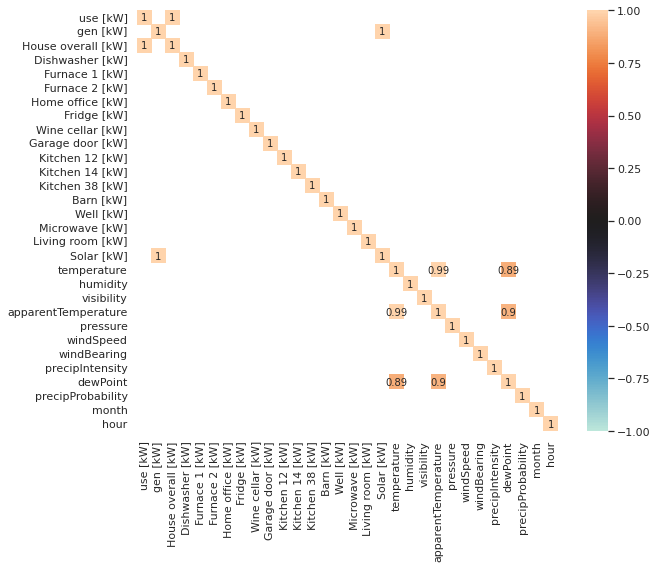

In [ ]:
fig = plt.subplots(figsize=(10, 8)) 
corr = home.corr()
sns.heatmap(corr[corr>0.8], vmax=1, vmin=-1, center=0,annot =True,square=True)
plt.tight_layout()
plt.show()

- we can see that **use-Houseoverall** and **gen-solar** are similar column so, we can drop duplicate columns

In [ ]:
home.drop(['Solar [kW]','use [kW]'],axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
home

time  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0      2016-01-01 05:00:00  0.003483            0.932833         0.000033   
1      2016-01-01 05:01:00  0.003467            0.934333         0.000000   
2      2016-01-01 05:02:00  0.003467            0.931817         0.000017   
3      2016-01-01 05:03:00  0.003483            1.022050         0.000017   
4      2016-01-01 05:04:00  0.003467            1.139400         0.000133   
...                    ...       ...                 ...              ...   
503905 2016-12-16 03:25:00  0.003183            1.601233         0.000050   
503906 2016-12-16 03:26:00  0.003233            1.599333         0.000050   
503907 2016-12-16 03:27:00  0.003217            1.924267         0.000033   
503908 2016-12-16 03:28:00  0.003217            1.978200         0.000050   
503909 2016-12-16 03:29:00  0.003233            1.990950         0.000050   

        Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0             0.020700        0.061917          0.442633     0.124150   
1             0.020717        0.063817          0.444067     0.124000   
2             0.020700        0.062317          0.446067     0.123533   
3             0.106900        0.068517          0.446583     0.123133   
4             0.236933        0.063983          0.446533     0.122850   
...                ...             ...               ...          ...   
503905        0.085267        0.642417          0.041783     0.005267   
503906        0.104017        0.625033          0.041750     0.005233   
503907        0.422383        0.637733          0.042033     0.004983   
503908        0.495667        0.620367          0.042100     0.005333   
503909        0.494700        0.634133          0.042100     0.004917   

        Wine cellar [kW]  Garage door [kW]  ...  pressure  windSpeed  \
0               0.006983          0.013083  ...   1016.91       9.18   
1               0.006983          0.013117  ...   1016.91       9.18   
2               0.006983          0.013083  ...   1016.91       9.18   
3               0.006983          0.013000  ...   1016.91       9.18   
4               0.006850          0.012783  ...   1016.91       9.18   
...                  ...               ...  ...       ...        ...   
503905          0.008667          0.013483  ...   1011.49       6.72   
503906          0.008433          0.013433  ...   1011.49       6.72   
503907          0.008467          0.012933  ...   1011.49       6.72   
503908          0.008233          0.012817  ...   1011.49       6.72   
503909          0.008133          0.012833  ...   1011.49       6.72   

        cloudCover  windBearing  precipIntensity  dewPoint  precipProbability  \
0       cloudCover        282.0           0.0000     24.40               0.00   
1       cloudCover        282.0           0.0000     24.40               0.00   
2       cloudCover        282.0           0.0000     24.40               0.00   
3       cloudCover        282.0           0.0000     24.40               0.00   
4       cloudCover        282.0           0.0000     24.40               0.00   
...            ...          ...              ...       ...                ...   
503905        0.31        186.0           0.0101     31.27               0.51   
503906        0.31        186.0           0.0101     31.27               0.51   
503907        0.31        186.0           0.0101     31.27               0.51   
503908        0.31        186.0           0.0101     31.27               0.51   
503909        0.31        186.0           0.0101     31.27               0.51   

        weekday month  hour  
0        Friday     1     5  
1        Friday     1     5  
2        Friday     1     5  
3        Friday     1     5  
4        Friday     1     5  
...         ...   ...   ...  
503905   Friday    12     3  
503906   Friday    12     3  
503907   Friday    12     3  
503908   Friday    12     3  
503909   Friday    12     3  

[503910 rows x 33 col

##### Many columns of the dataset is having [kW] as an extension which is unwanted for us. So, we will remove those.

In [ ]:
home.columns = [i.replace(' [kW]', '') for i in home.columns]

In [ ]:
# To overview the every column of dataset let's set option for max_columns
pd.set_option('display.max_columns', None)

In [ ]:
home

time       gen  House overall  Dishwasher  Furnace 1  \
0      2016-01-01 05:00:00  0.003483       0.932833    0.000033   0.020700   
1      2016-01-01 05:01:00  0.003467       0.934333    0.000000   0.020717   
2      2016-01-01 05:02:00  0.003467       0.931817    0.000017   0.020700   
3      2016-01-01 05:03:00  0.003483       1.022050    0.000017   0.106900   
4      2016-01-01 05:04:00  0.003467       1.139400    0.000133   0.236933   
...                    ...       ...            ...         ...        ...   
503905 2016-12-16 03:25:00  0.003183       1.601233    0.000050   0.085267   
503906 2016-12-16 03:26:00  0.003233       1.599333    0.000050   0.104017   
503907 2016-12-16 03:27:00  0.003217       1.924267    0.000033   0.422383   
503908 2016-12-16 03:28:00  0.003217       1.978200    0.000050   0.495667   
503909 2016-12-16 03:29:00  0.003233       1.990950    0.000050   0.494700   

        Furnace 2  Home office    Fridge  Wine cellar  Garage door  \
0        0.061917     0.442633  0.124150     0.006983     0.013083   
1        0.063817     0.444067  0.124000     0.006983     0.013117   
2        0.062317     0.446067  0.123533     0.006983     0.013083   
3        0.068517     0.446583  0.123133     0.006983     0.013000   
4        0.063983     0.446533  0.122850     0.006850     0.012783   
...           ...          ...       ...          ...          ...   
503905   0.642417     0.041783  0.005267     0.008667     0.013483   
503906   0.625033     0.041750  0.005233     0.008433     0.013433   
503907   0.637733     0.042033  0.004983     0.008467     0.012933   
503908   0.620367     0.042100  0.005333     0.008233     0.012817   
503909   0.634133     0.042100  0.004917     0.008133     0.012833   

        Kitchen 12  Kitchen 14  Kitchen 38      Barn      Well  Microwave  \
0         0.000417    0.000150    0.000000  0.031350  0.001017   0.004067   
1         0.000417    0.000150    0.000000  0.031500  0.001017   0.004067   
2         0.000433    0.000167    0.000017  0.031517  0.001000   0.004067   
3         0.000433    0.000217    0.000000  0.031500  0.001017   0.004067   
4         0.000450    0.000333    0.000000  0.031500  0.001017   0.004067   
...            ...         ...         ...       ...       ...        ...   
503905    0.000467    0.000150    0.000017  0.032283  0.000983   0.003800   
503906    0.000467    0.000100    0.000033  0.032200  0.000950   0.003800   
503907    0.000533    0.000067    0.000000  0.032283  0.001000   0.003750   
503908    0.000517    0.000117    0.000017  0.032183  0.000950   0.003767   
503909    0.000517    0.000117    0.000017  0.032167  0.000950   0.003767   

        Living room  temperature         icon  humidity  visibility  \
0          0.001517        36.14  clear-night      0.62       10.00   
1          0.001650        36.14  clear-night      0.62       10.00   
2          0.001650        36.14  clear-night      0.62       10.00   
3          0.001617        36.14  clear-night      0.62       10.00   
4          0.001583        36.14  clear-night      0.62       10.00   
...             ...          ...          ...       ...         ...   
503905     0.000967        35.12         rain      0.86        8.74   
503906     0.000933        35.12         rain      0.86        8.74   
503907     0.001000        35.12         rain      0.86        8.74   
503908     0.000950        35.12         rain      0.86        8.74   
503909     0.000950        35.12         rain      0.86        8.74   

           summary  apparentTemperature  pressure  windSpeed  cloudCover  \
0            Clear                29.26   1016.91       9.18  cloudCover   
1            Clear                29.26   1016.91       9.18  cloudCover   
2            Clear                29.26   1016.91       9.18  cloudCover   
3            Clear                29.26   1016.91       9.18  cloudCover   
4            Clear                29.26   1016.91       9.18  cloudCover   
...       

### Observations from above table:-

- **Furnace 1, 2** are realted to same category we can combine both and create a single column of **Furnace**.
- We can Combine **Kitchen 12,14 and 38** to Single column of **Kitchen**.
- **icon and summary** is some what sharing the same details so we can analyse them.
- **cloudCover** is having string as well as numeric value so need to analyse it.

In [ ]:
home['Furnace'] = home['Furnace 1'] + home['Furnace 2']
home['Kitchen'] = home['Kitchen 12'] + home['Kitchen 14'] + home['Kitchen 38']
home.drop(['Furnace 1','Furnace 2','Kitchen 14','Kitchen 12','Kitchen 38'],axis=1,inplace=True)

<ipython-input-19-078d9b3e1f54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['Furnace'] = home['Furnace 1'] + home['Furnace 2']
<ipython-input-19-078d9b3e1f54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['Kitchen'] = home['Kitchen 12'] + home['Kitchen 14'] + home['Kitchen 38']
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

In [ ]:
home

time       gen  House overall  Dishwasher  Home office  \
0      2016-01-01 05:00:00  0.003483       0.932833    0.000033     0.442633   
1      2016-01-01 05:01:00  0.003467       0.934333    0.000000     0.444067   
2      2016-01-01 05:02:00  0.003467       0.931817    0.000017     0.446067   
3      2016-01-01 05:03:00  0.003483       1.022050    0.000017     0.446583   
4      2016-01-01 05:04:00  0.003467       1.139400    0.000133     0.446533   
...                    ...       ...            ...         ...          ...   
503905 2016-12-16 03:25:00  0.003183       1.601233    0.000050     0.041783   
503906 2016-12-16 03:26:00  0.003233       1.599333    0.000050     0.041750   
503907 2016-12-16 03:27:00  0.003217       1.924267    0.000033     0.042033   
503908 2016-12-16 03:28:00  0.003217       1.978200    0.000050     0.042100   
503909 2016-12-16 03:29:00  0.003233       1.990950    0.000050     0.042100   

          Fridge  Wine cellar  Garage door      Barn      Well  Microwave  \
0       0.124150     0.006983     0.013083  0.031350  0.001017   0.004067   
1       0.124000     0.006983     0.013117  0.031500  0.001017   0.004067   
2       0.123533     0.006983     0.013083  0.031517  0.001000   0.004067   
3       0.123133     0.006983     0.013000  0.031500  0.001017   0.004067   
4       0.122850     0.006850     0.012783  0.031500  0.001017   0.004067   
...          ...          ...          ...       ...       ...        ...   
503905  0.005267     0.008667     0.013483  0.032283  0.000983   0.003800   
503906  0.005233     0.008433     0.013433  0.032200  0.000950   0.003800   
503907  0.004983     0.008467     0.012933  0.032283  0.001000   0.003750   
503908  0.005333     0.008233     0.012817  0.032183  0.000950   0.003767   
503909  0.004917     0.008133     0.012833  0.032167  0.000950   0.003767   

        Living room  temperature         icon  humidity  visibility  \
0          0.001517        36.14  clear-night      0.62       10.00   
1          0.001650        36.14  clear-night      0.62       10.00   
2          0.001650        36.14  clear-night      0.62       10.00   
3          0.001617        36.14  clear-night      0.62       10.00   
4          0.001583        36.14  clear-night      0.62       10.00   
...             ...          ...          ...       ...         ...   
503905     0.000967        35.12         rain      0.86        8.74   
503906     0.000933        35.12         rain      0.86        8.74   
503907     0.001000        35.12         rain      0.86        8.74   
503908     0.000950        35.12         rain      0.86        8.74   
503909     0.000950        35.12         rain      0.86        8.74   

           summary  apparentTemperature  pressure  windSpeed  cloudCover  \
0            Clear                29.26   1016.91       9.18  cloudCover   
1            Clear                29.26   1016.91       9.18  cloudCover   
2            Clear                29.26   1016.91       9.18  cloudCover   
3            Clear                29.26   1016.91       9.18  cloudCover   
4            Clear                29.26   1016.91       9.18  cloudCover   
...            ...                  ...       ...        ...         ...   
503905  Light Rain                29.45   1011.49       6.72        0.31   
503906  Light Rain                29.45   1011.49       6.72        0.31   
503907  Light Rain                29.45   1011.49       6.72        0.31   
503908  Light Rain                29.45   1011.49       6.72        0.31   
503909  Light Rain                29.45   1011.49       6.72        0.31   

        windBearing  precipIntensity  dewPoint  precipProbability weekday  \
0             282.0           0.0000     24.40               0.00  Friday   
1             282.0           0.0000     24.40               0.00  Friday   
2             282.0           0.0000     24.40               0.00  Friday   
3             282.0           0.0000     24.40               0

In [ ]:
home['icon'].value_counts()

clear-night            194536
clear-day              182252
rain                    43081
partly-cloudy-day       39492
partly-cloudy-night     27324
snow                     7550
cloudy                   6041
wind                     2660
fog                       974
Name: icon, dtype: int64

In [ ]:
home['summary'].value_counts()

Clear                       376730
Partly Cloudy                62268
Light Rain                   27368
Drizzle                      10370
Overcast                      6041
Rain                          5169
Mostly Cloudy                 4548
Light Snow                    4323
Flurries                      1789
Breezy                        1561
Snow                          1152
Breezy and Partly Cloudy      1041
Foggy                          974
Rain and Breezy                174
Heavy Snow                     171
Flurries and Breezy            115
Breezy and Mostly Cloudy        58
Dry                             58
Name: summary, dtype: int64

- Now if we better understand the purpose of the project we can say that, we need data for different month - that we have in month column, than we require timing, day and all which also available in hour and weekday column.

- Also, there is different column for cloudcover and precipitition so, we can get that too for rain and all.

##### So, From these we can say that, we don't need **summary and icon** columns.

In [ ]:
home.drop(['icon','summary'],axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
home['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', 0.24, 1.0, 0.31, 0.28, 0.15, 0.41, 0.1, 0.12, 0.08, 0.09,
       0.19, 0.04, 0.05, 0.29, 0.27, 0.35, 0.18, 0.06, 0.03, 0.11, 0.14,
       0.25, 0.78, 0.0, 0.16, 0.21, 0.23, 0.17, 0.75, 0.26, 0.2, 0.76,
       0.13, 0.77, 0.46, 0.07, 0.55, 0.02, 0.01, 0.51, 0.47, 0.5, 0.4,
       0.3, 0.22, 0.43, 0.33, 0.6, 0.68, 0.66, 0.45, 0.34, 0.52, 0.67,
       0.48, 0.49, 0.39, 0.37, 0.62, 0.36, 0.79, 0.61, 0.38, 0.42, 0.53,
       0.63, 0.44, 0.54, 0.32, 0.56, 0.58, 0.72, 0.57, 0.73, 0.71, 0.64,
       0.59], dtype=object)

- From this we can say that there is only 1 str so, let's analyze that.

In [ ]:
home[home['cloudCover']=='cloudCover'].shape

(58, 28)

##### Great!! only 58 rows are having value as cloudcover. 

- We cannot remove those as it will affect continuity of data.
- We replace the value using backfill as, readings are taken at 1min time stamp.

In [ ]:
home['cloudCover'].replace(['cloudCover'],method='bfill', inplace=True)
home['cloudCover'] = home['cloudCover'].astype('float')

<ipython-input-26-6b173715cd40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['cloudCover'] = home['cloudCover'].astype('float')


In [ ]:
home

time       gen  House overall  Dishwasher  Home office  \
0      2016-01-01 05:00:00  0.003483       0.932833    0.000033     0.442633   
1      2016-01-01 05:01:00  0.003467       0.934333    0.000000     0.444067   
2      2016-01-01 05:02:00  0.003467       0.931817    0.000017     0.446067   
3      2016-01-01 05:03:00  0.003483       1.022050    0.000017     0.446583   
4      2016-01-01 05:04:00  0.003467       1.139400    0.000133     0.446533   
...                    ...       ...            ...         ...          ...   
503905 2016-12-16 03:25:00  0.003183       1.601233    0.000050     0.041783   
503906 2016-12-16 03:26:00  0.003233       1.599333    0.000050     0.041750   
503907 2016-12-16 03:27:00  0.003217       1.924267    0.000033     0.042033   
503908 2016-12-16 03:28:00  0.003217       1.978200    0.000050     0.042100   
503909 2016-12-16 03:29:00  0.003233       1.990950    0.000050     0.042100   

          Fridge  Wine cellar  Garage door      Barn      Well  Microwave  \
0       0.124150     0.006983     0.013083  0.031350  0.001017   0.004067   
1       0.124000     0.006983     0.013117  0.031500  0.001017   0.004067   
2       0.123533     0.006983     0.013083  0.031517  0.001000   0.004067   
3       0.123133     0.006983     0.013000  0.031500  0.001017   0.004067   
4       0.122850     0.006850     0.012783  0.031500  0.001017   0.004067   
...          ...          ...          ...       ...       ...        ...   
503905  0.005267     0.008667     0.013483  0.032283  0.000983   0.003800   
503906  0.005233     0.008433     0.013433  0.032200  0.000950   0.003800   
503907  0.004983     0.008467     0.012933  0.032283  0.001000   0.003750   
503908  0.005333     0.008233     0.012817  0.032183  0.000950   0.003767   
503909  0.004917     0.008133     0.012833  0.032167  0.000950   0.003767   

        Living room  temperature  humidity  visibility  apparentTemperature  \
0          0.001517        36.14      0.62       10.00                29.26   
1          0.001650        36.14      0.62       10.00                29.26   
2          0.001650        36.14      0.62       10.00                29.26   
3          0.001617        36.14      0.62       10.00                29.26   
4          0.001583        36.14      0.62       10.00                29.26   
...             ...          ...       ...         ...                  ...   
503905     0.000967        35.12      0.86        8.74                29.45   
503906     0.000933        35.12      0.86        8.74                29.45   
503907     0.001000        35.12      0.86        8.74                29.45   
503908     0.000950        35.12      0.86        8.74                29.45   
503909     0.000950        35.12      0.86        8.74                29.45   

        pressure  windSpeed  cloudCover  windBearing  precipIntensity  \
0        1016.91       9.18        0.75        282.0           0.0000   
1        1016.91       9.18        0.75        282.0           0.0000   
2        1016.91       9.18        0.75        282.0           0.0000   
3        1016.91       9.18        0.75        282.0           0.0000   
4        1016.91       9.18        0.75        282.0           0.0000   
...          ...        ...         ...          ...              ...   
503905   1011.49       6.72        0.31        186.0           0.0101   
503906   1011.49       6.72        0.31        186.0           0.0101   
503907   1011.49       6.72        0.31        186.0           0.0101   
503908   1011.49       6.72        0.31        186.0           0.0101   
503909   1011.49       6.72        0.31        186.0           0.0101   

        dewPoint  precipProbability weekday  month  hour   Furnace   Kitchen  
0          24.40               0.00  Friday      1     5  0.082617  0.000567  
1          24.40               0.00  Friday      1     5  0.084533  0.000567  
2          24.40               0.00  Friday      1     5  0.083017  0.000

In [ ]:
# Defining a function to plot distribution plot and a boxplot
# Inputting the feature name and the color palette decided above.
def plot_data_num(column,clr,df):
    # figsize is given along with the rows=1 and columns=2
    fig,axes = plt.subplots(1,2,figsize=(18,5))
    # super title is given with fontsize
    fig.suptitle(column,fontsize=20,fontstyle='oblique')

    # Distribution plot is plotted with axis label as column name 
    sns.distplot(ax=axes[0],x=df[column],axlabel=column,color=clr[0])
    # Title name of the distribution plot
    axes[0].set_title('Distribution of {}'.format(column),fontstyle='italic',fontsize=15,color='black')
    # axes[0].set_title('Histogram of {} \n std={:.4f} \n var={:.4f} \n skew={:.4f} \n kurtosis={:.4f}'.format(column,
                       # df[column].std(),df[column].var(),df[column].skew(),df[column].kurtosis()),fontsize=15)
    plt.text(.95,.95,'std={:.4f} \n var={:.4f} \n skew={:.4f} \n kurtosis={:.4f}'.format(df[column].std(),
                df[column].var(),df[column].skew(),df[column].kurtosis()),ha='right', va='top', transform=axes[1].transAxes)

    # Box plot is made to check the Inter Quartile range and the stats inferences
    sns.boxplot(ax=axes[1],x=column,data=df,color=clr[3])
    # Title of box plot is set and there it goes!! 
    axes[1].set_title('Boxplot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')
    plt.show()

In [ ]:
colors = ['#0B0B11','#8288C3','#242961','#D0BED4']

In [ ]:
cols = home.columns
cols

Index(['time', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'temperature', 'humidity', 'visibility',
       'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'weekday', 'month', 'hour', 'Furnace', 'Kitchen'],
      dtype='object')

##### From the list of the above columns we can perform univariate analysis of weather parameters and time series analysis of appliances and solar generation

In [ ]:
weather_para = ['temperature', 'humidity', 'visibility',
       'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


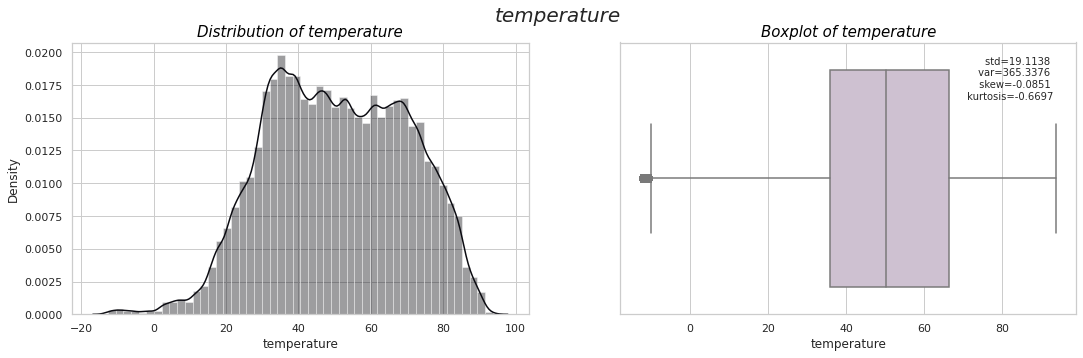

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


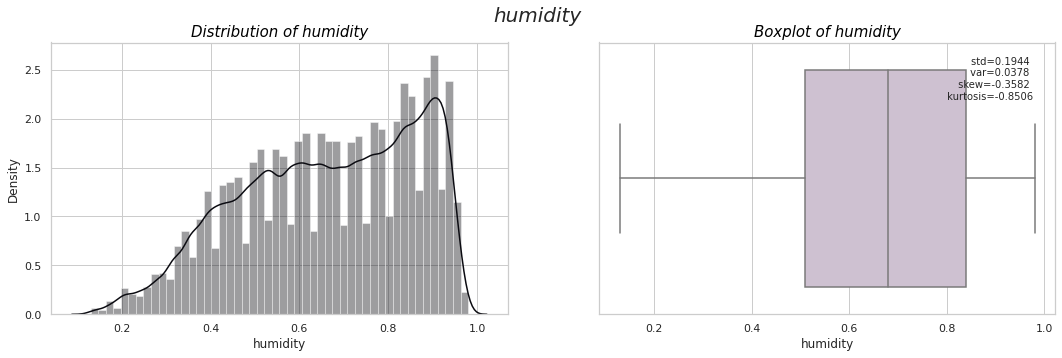

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


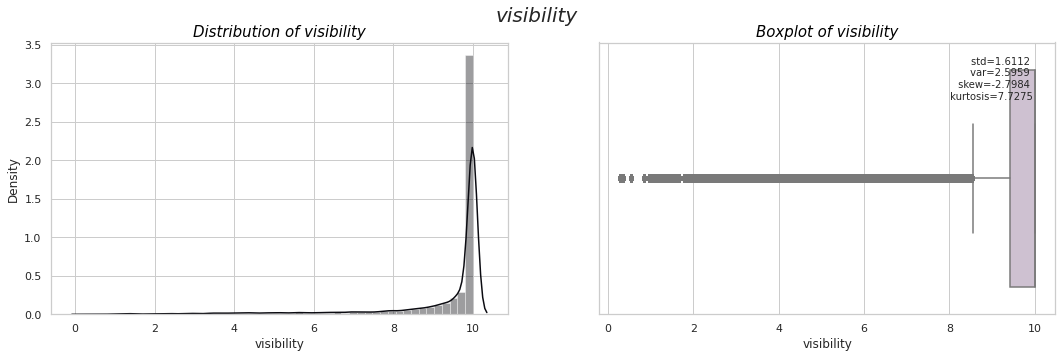

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


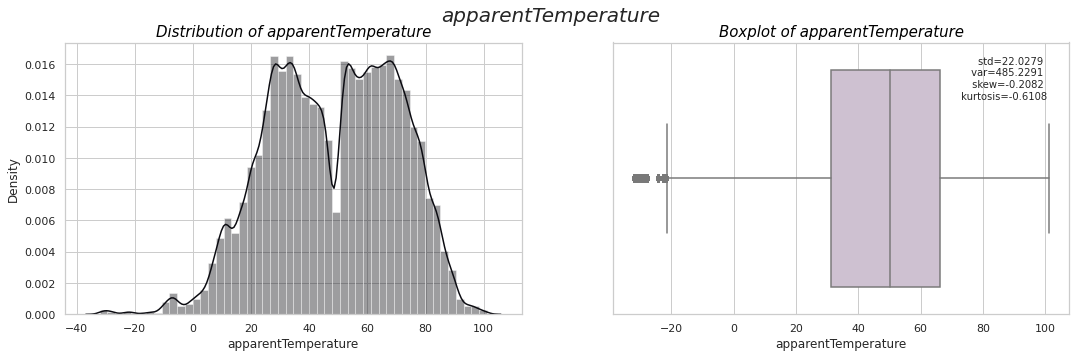

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


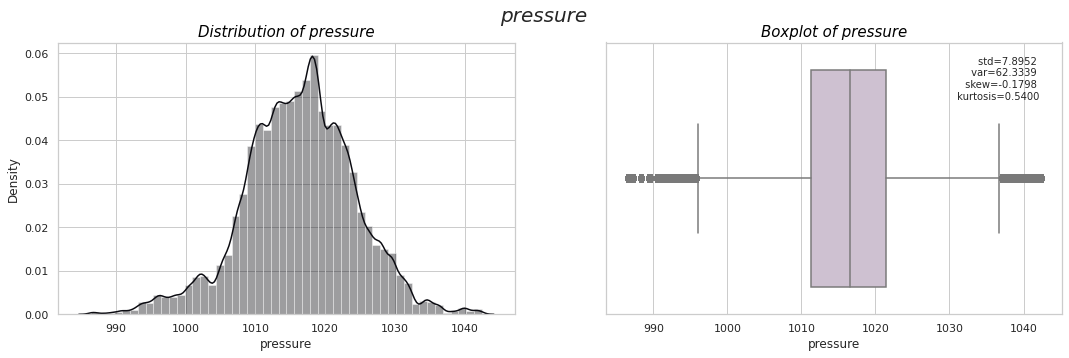

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


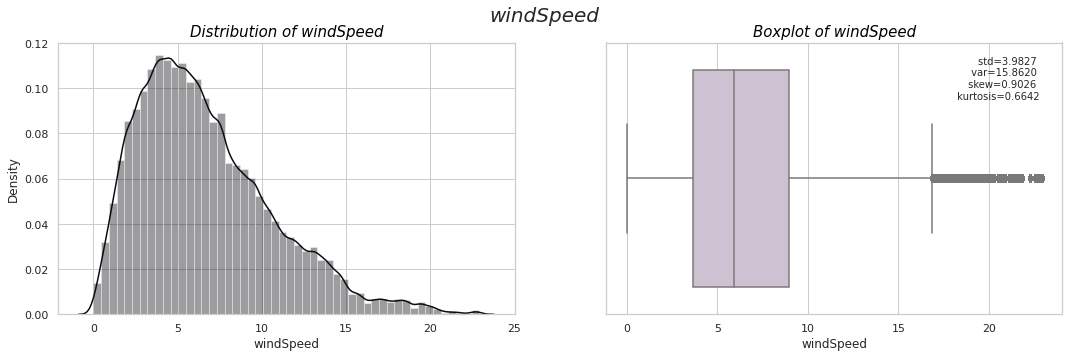

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


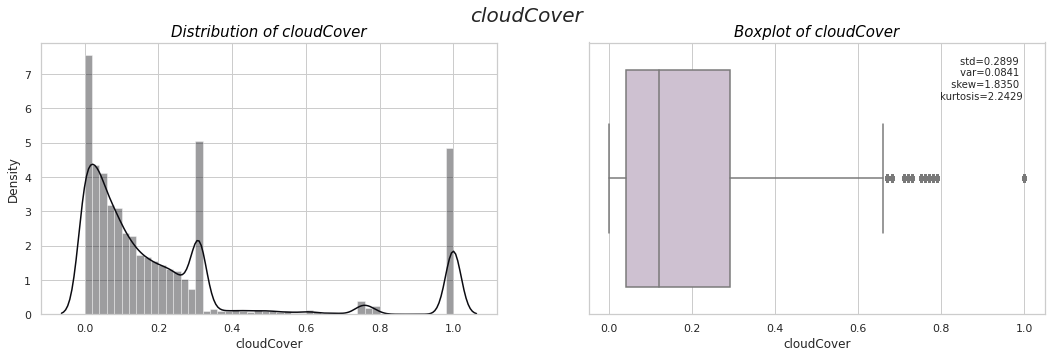

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


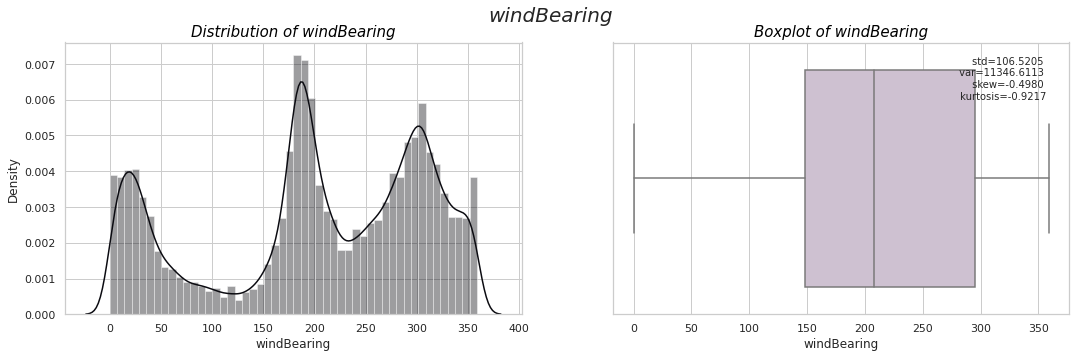

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


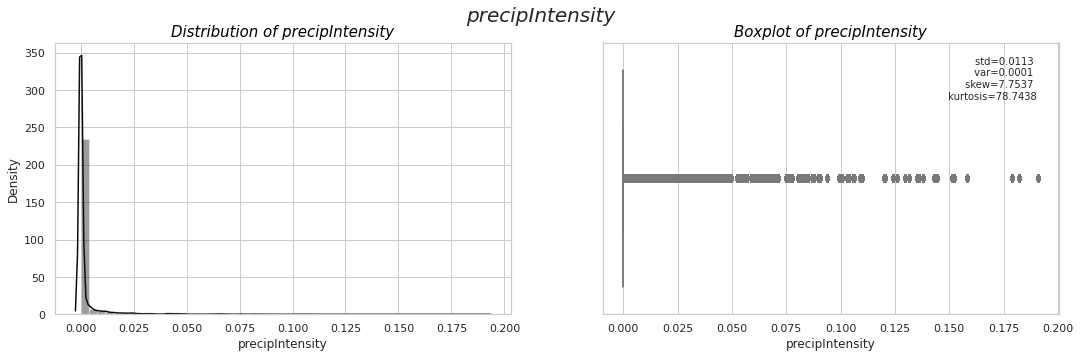

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


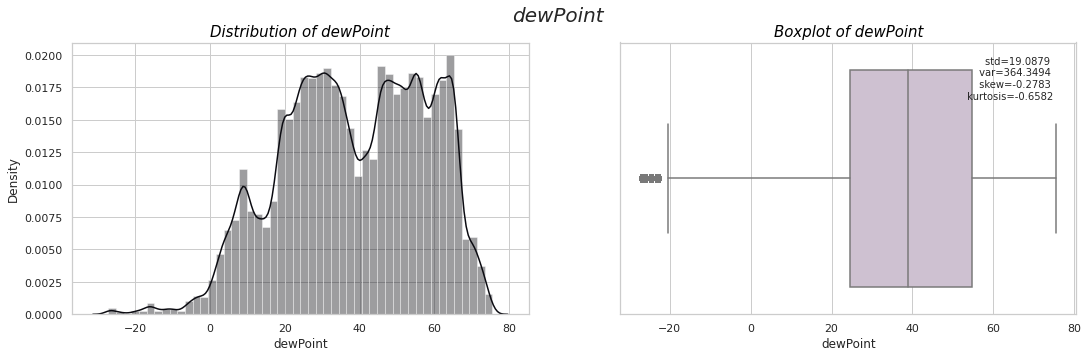

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


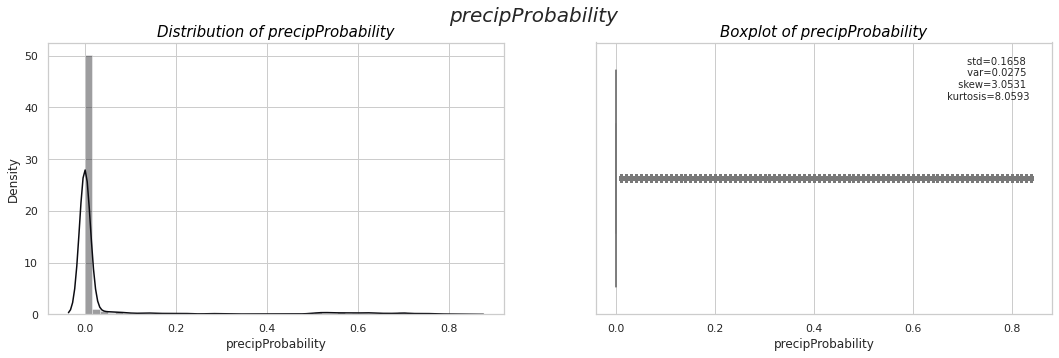

In [ ]:
for i in range(len(weather_para)):
    plot_data_num(weather_para[i],colors,home)
        
        

### Observation of Univariate Analysis

- **visibility, preipprobability and PrecipIntensity** are very skewed data having almost similar value all the time.
- **Temperature,humidity,Apparent Temperature, Wind Bearing and Dew Point** are very spread out datas having high variance. 
- **Pressure and Wind Speed** are pretty much normally distributed.

## Time Series Analysis

- Now we will perform Time Series Analysis of Energy Consumption by different appliances!!
- For that we will prepare charts for monthly average, weekly average.

In [ ]:
def groupBymonth(col,df):
    return df[[col,'month']].groupby('month').agg({col:['mean']})

In [ ]:
def groupByWeekday(col,df):
    weekdayDf = df.groupby('weekday').agg({col:['mean']})
    weekdayDf.columns = [f"{i[0]}_{i[1]}" for i in weekdayDf.columns]
    weekdayDf['week_num'] = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(i) for i in weekdayDf.index]
    weekdayDf.sort_values('week_num', inplace=True)
    weekdayDf.drop('week_num', axis=1, inplace=True)
    return weekdayDf

In [ ]:
def plot_groupBy(col,df):
    # figsize is given along with the rows=1 and columns=3
    fig,axes = plt.subplots(1,3,figsize=(24,6))
    # super title is given with fontsize
    fig.suptitle(col.upper(),fontsize=20,fontstyle='oblique')
    
    # line plot is plotted to visualize the daily usage
    sns.lineplot(ax=axes[0],data=df[['time',col]].groupby(pd.Grouper(key='time',freq='1D')).sum())
    # Title name of the Monthly Average plot plot
    axes[0].set_title('Daily Time Series of {}'.format(col),fontstyle='italic',fontsize=15,color='black')
    
    # line plot is plotted to visualize the variation in monthly average in column
    sns.lineplot(ax=axes[1],data = groupBymonth(col,df));
    # Title name of the Monthly Average plot plot
    axes[1].set_title('Monthly average Time Series of {}'.format(col),fontstyle='italic',fontsize=15,color='black')
    
    
    # line plot is plotted to visualize the variation in weekly mean in column
    sns.lineplot(ax=axes[2],data = groupByWeekday(col,df));
    # Title name of the weekly Average plot plot
    axes[2].set_title('weekly average Time Series of {}'.format(col),fontstyle='italic',fontsize=15,color='black')
    plt.show()

In [ ]:
Appliances_Area = ['Dishwasher','Home office','Fridge','Wine cellar','Garage door','Barn','Well','Microwave','Living room','House overall']

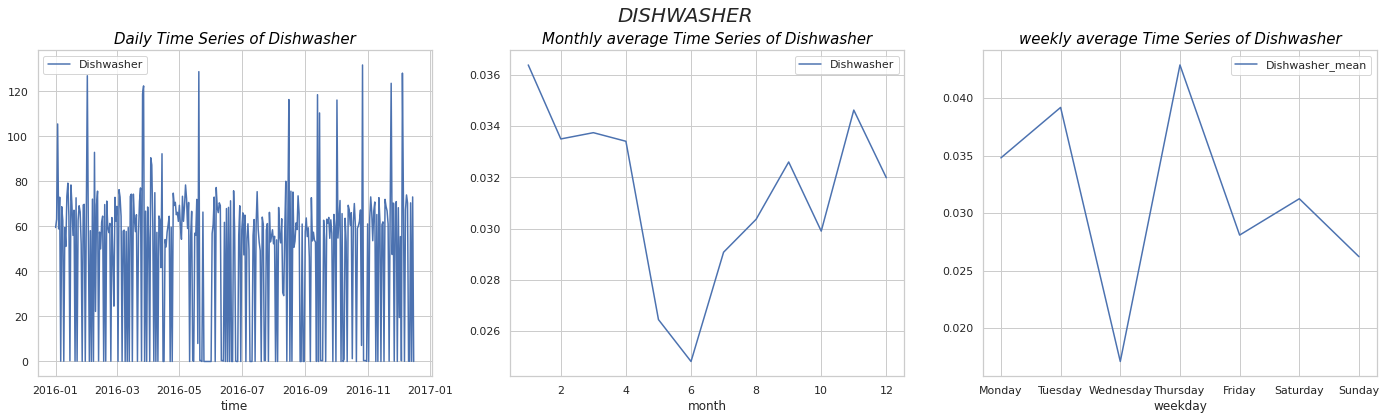

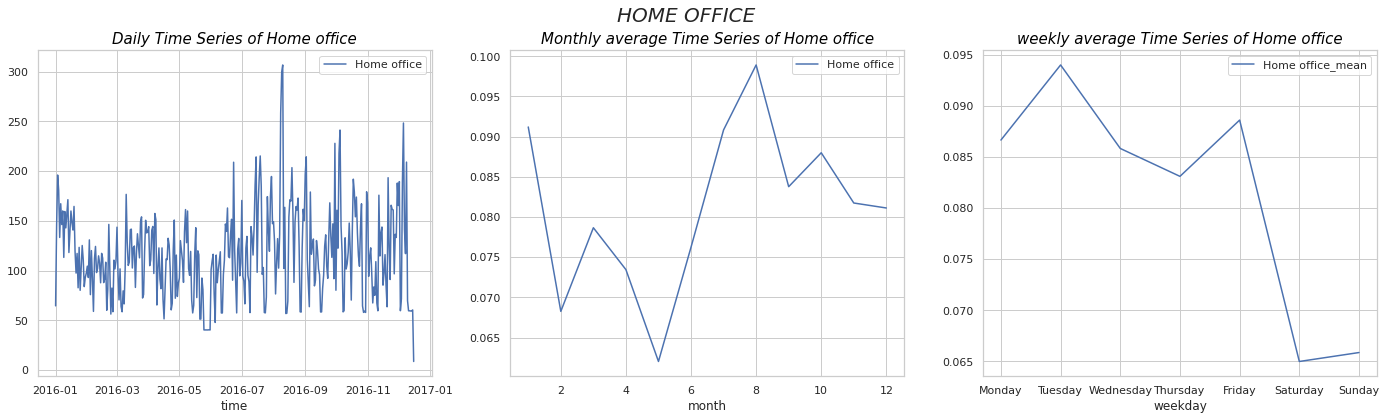

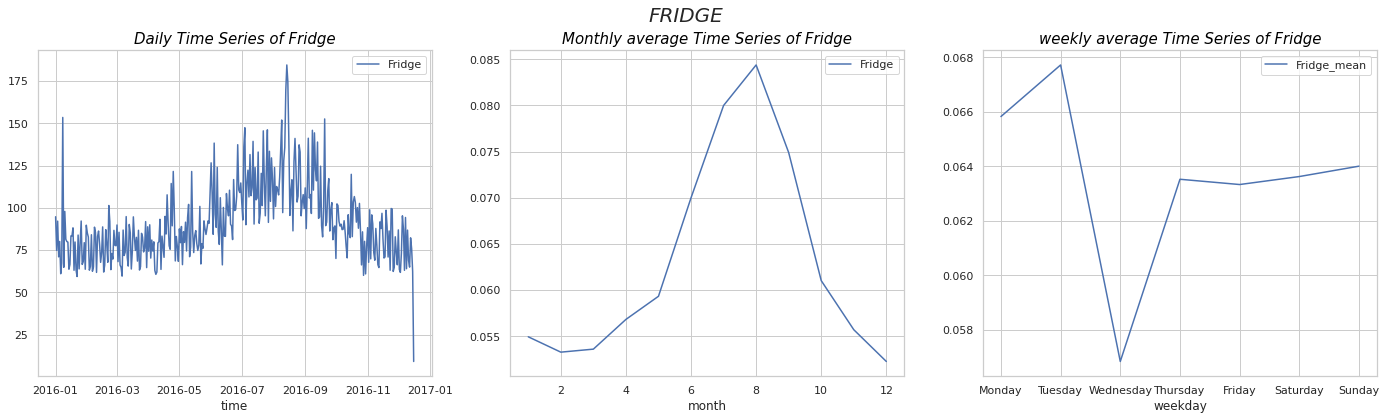

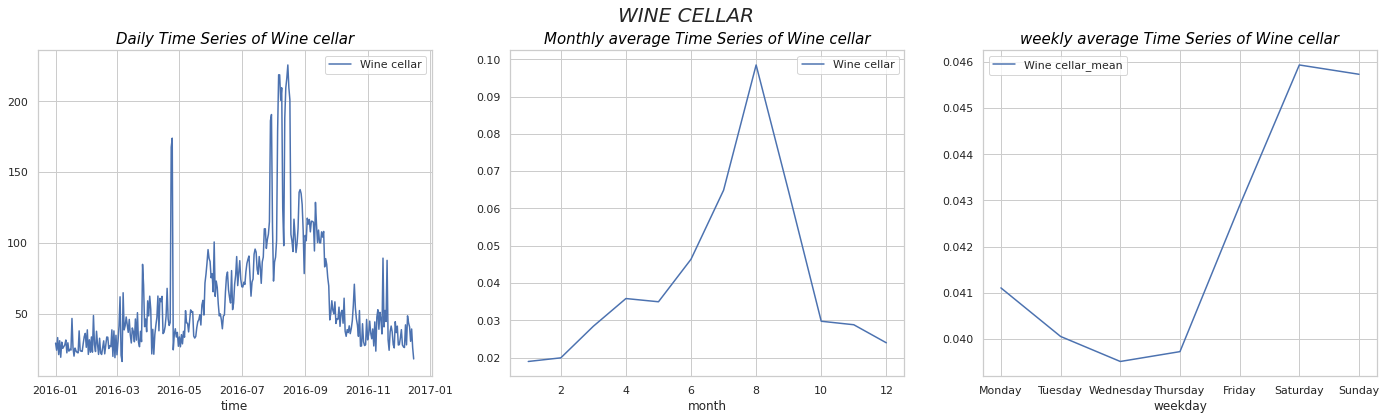

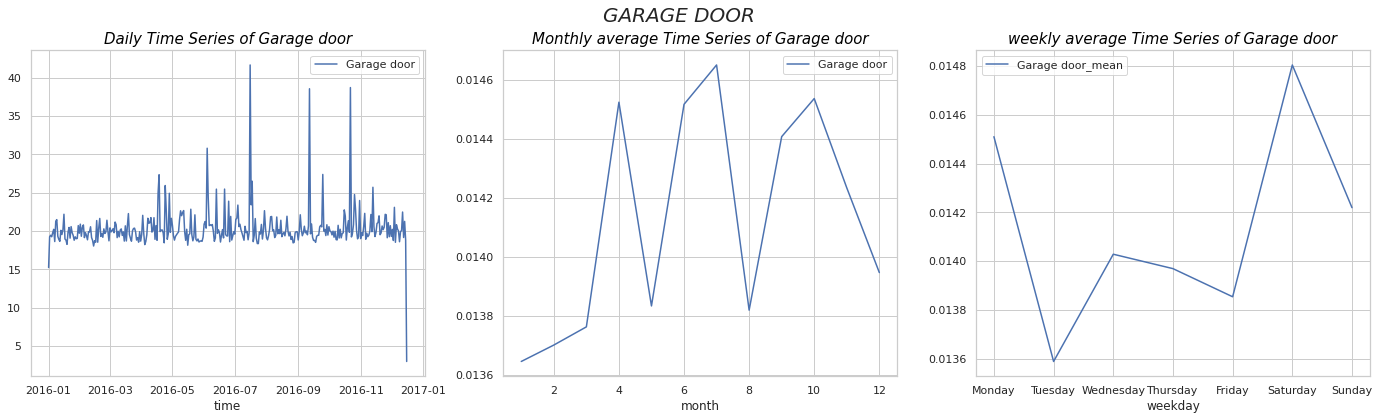

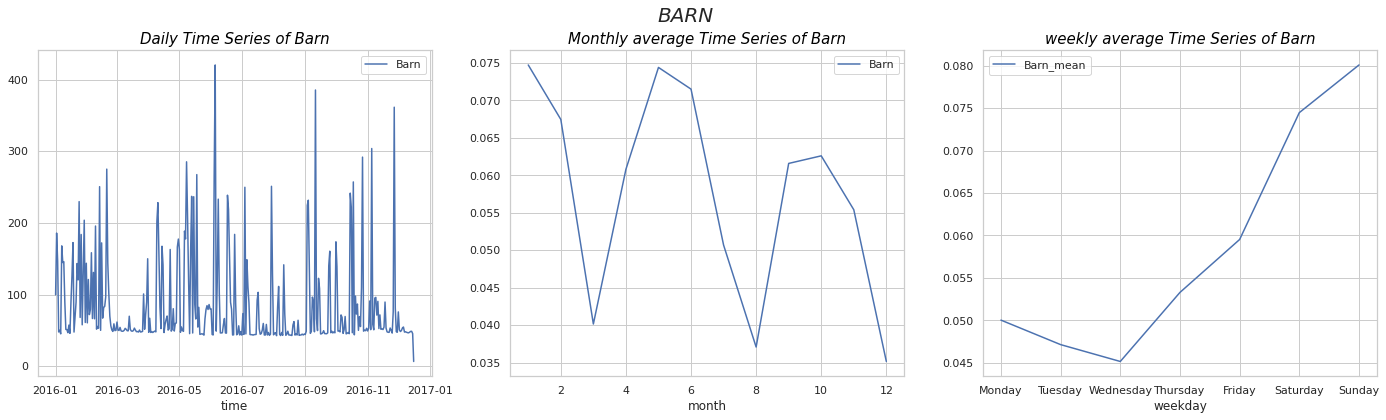

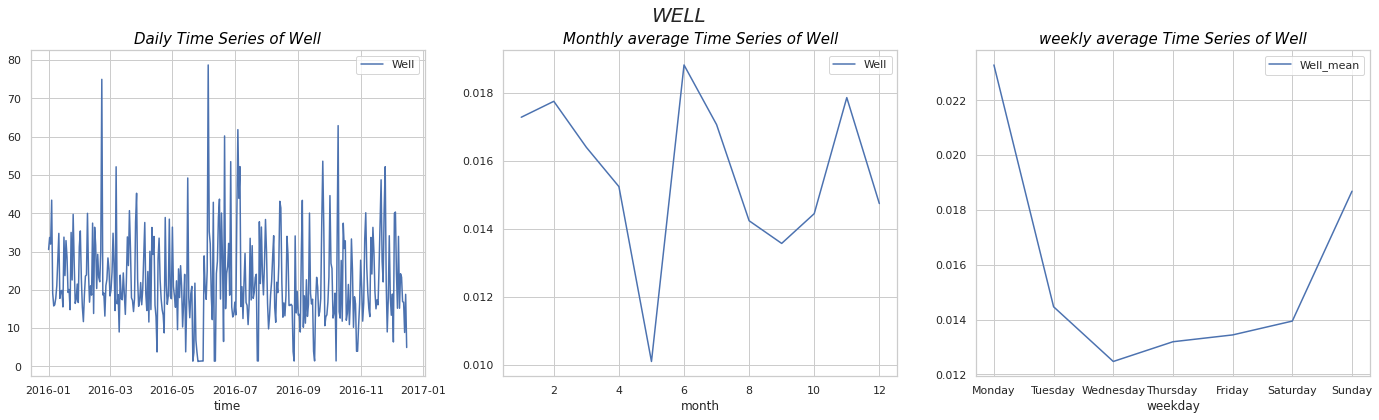

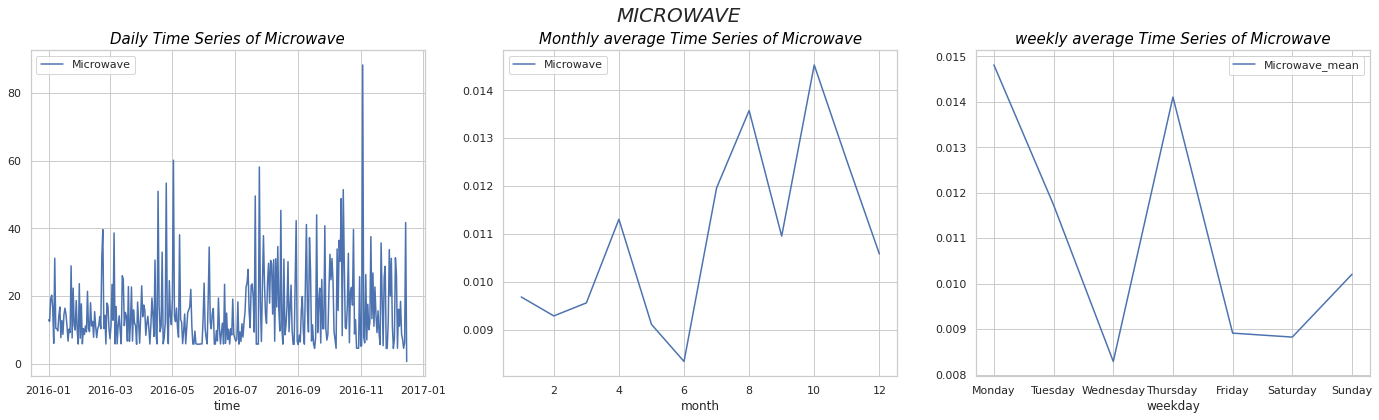

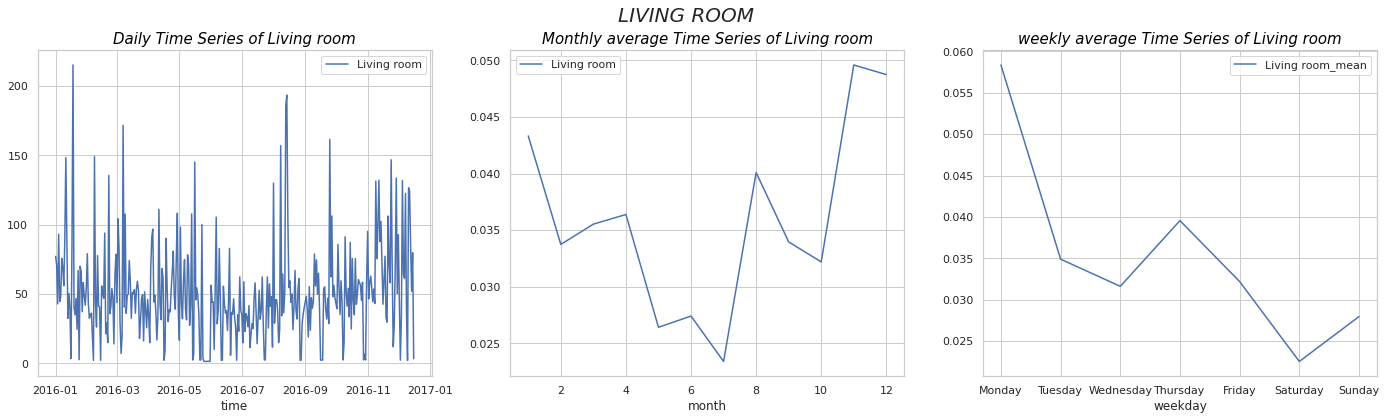

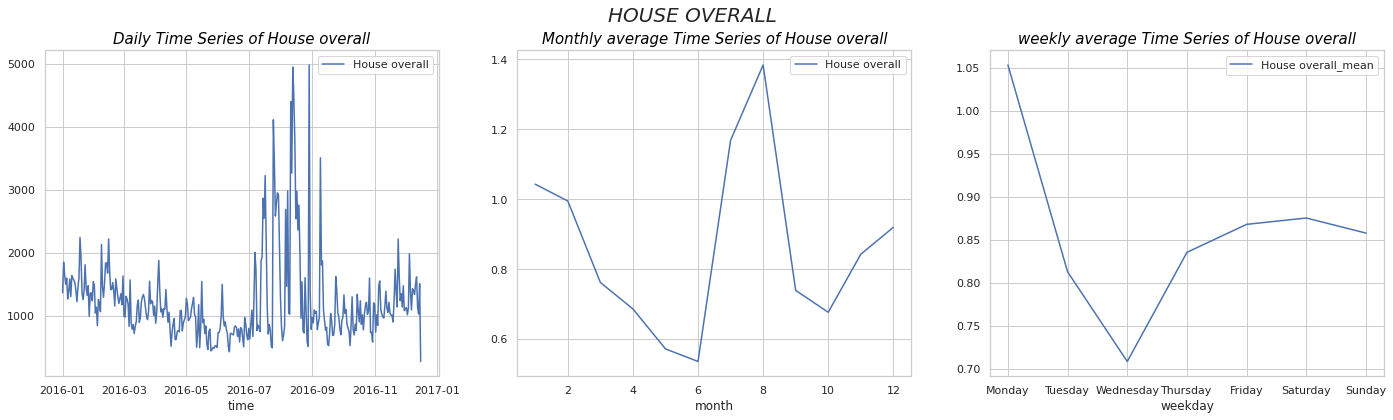

In [ ]:
for i in range(len(Appliances_Area)):
    plot_groupBy(Appliances_Area[i],home)

### Observations
- **Diswasher** is having monthly trend with least usage in june while in weekly bases it is least used on wednesday.
- **Home Office** is having higher contribution to the overall usage. Also, in weekly basis it is least not used much on weekends.
- **Fridge and Wine Cellar** are definitely having a monthly trend with highest usage in summer and in weekly basis it is least used on wednesday.
- **Living Room** is highly used in winter and on monday's
- **House Overall** usage is highest in summer as Fridge and Wine Cellar is used more and it seems that on wednesday's very less energy is used.
- **Garage Door,Barn,Well and Microwave** does not seem to have any trends on monthly r weekly basis.

### Weather Parameter - Time Series

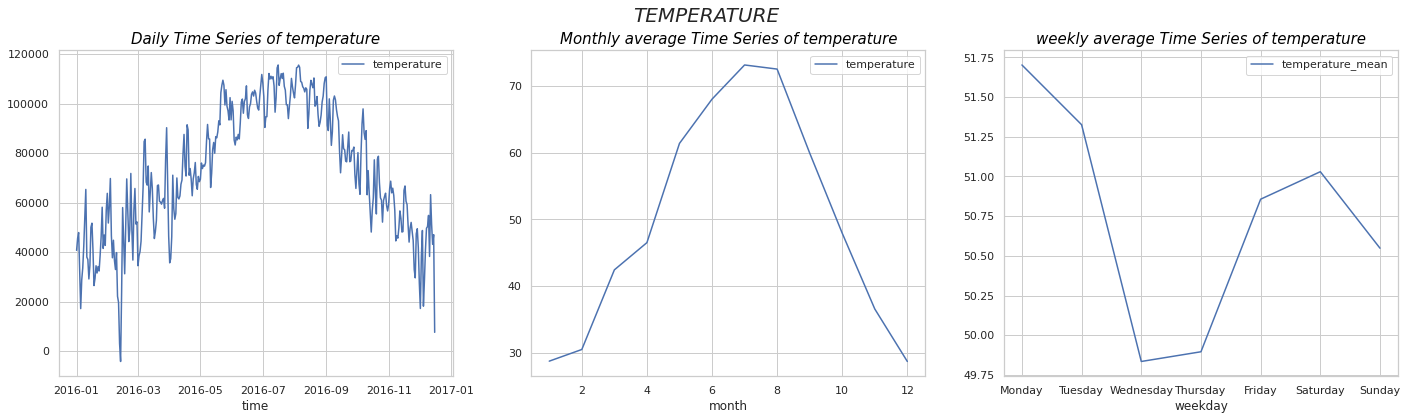

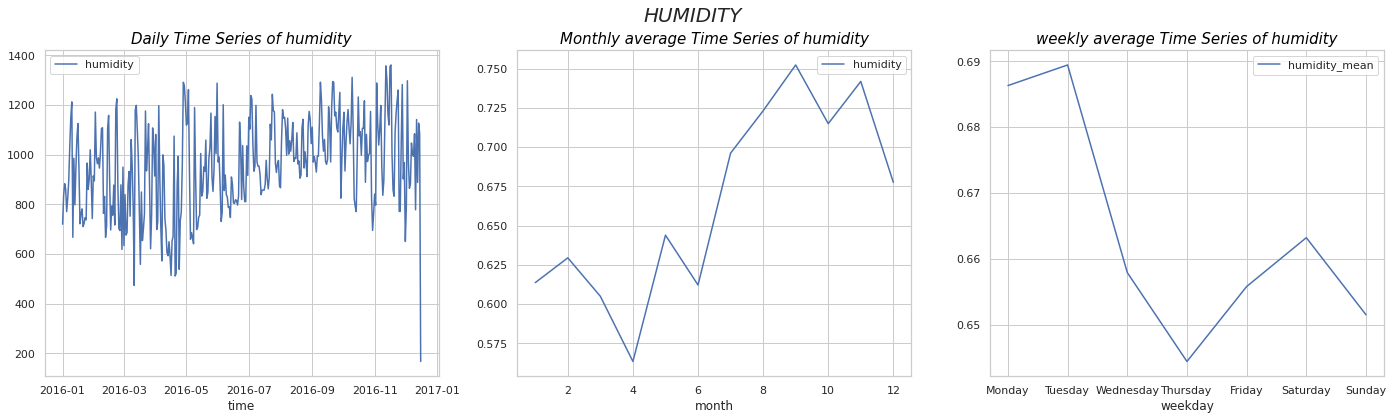

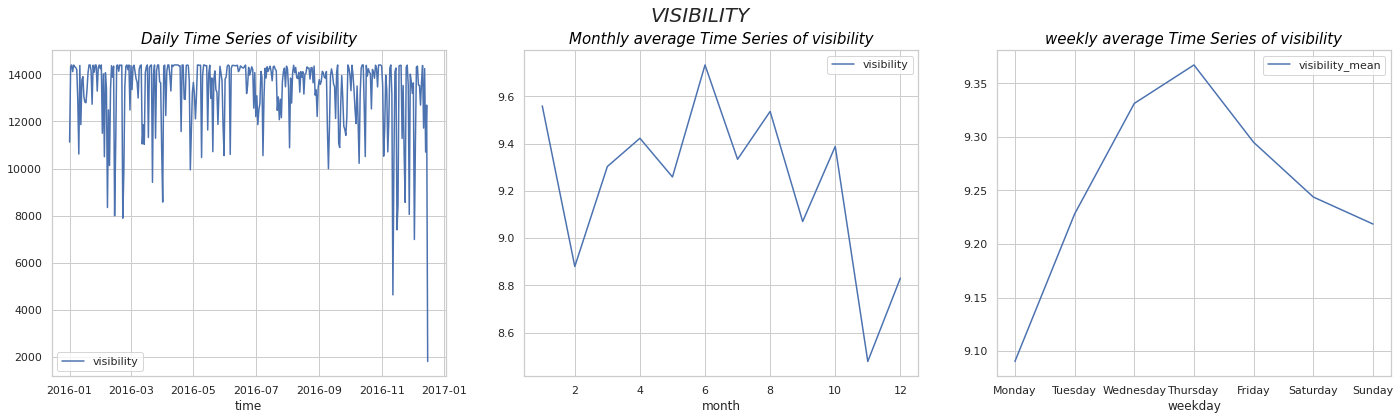

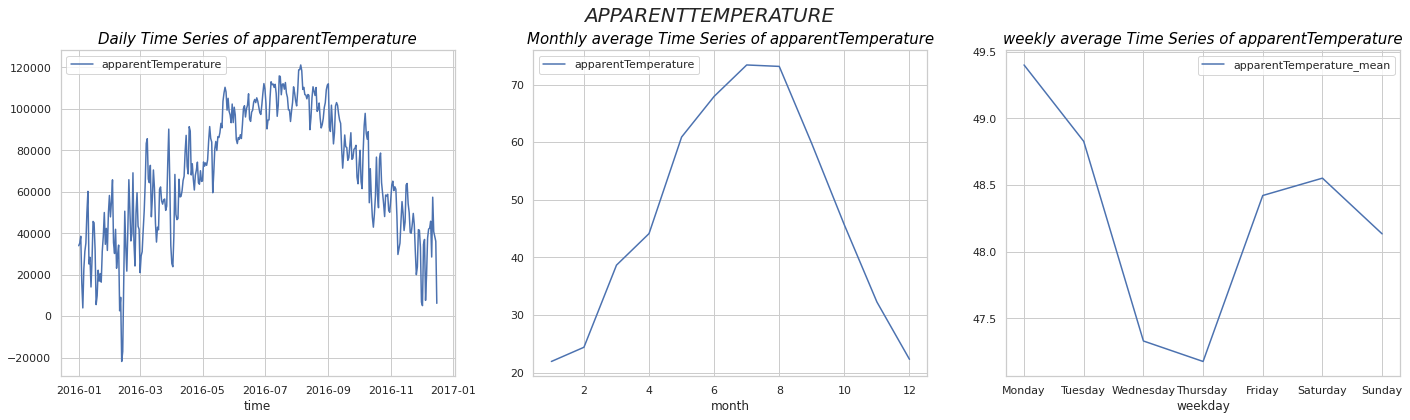

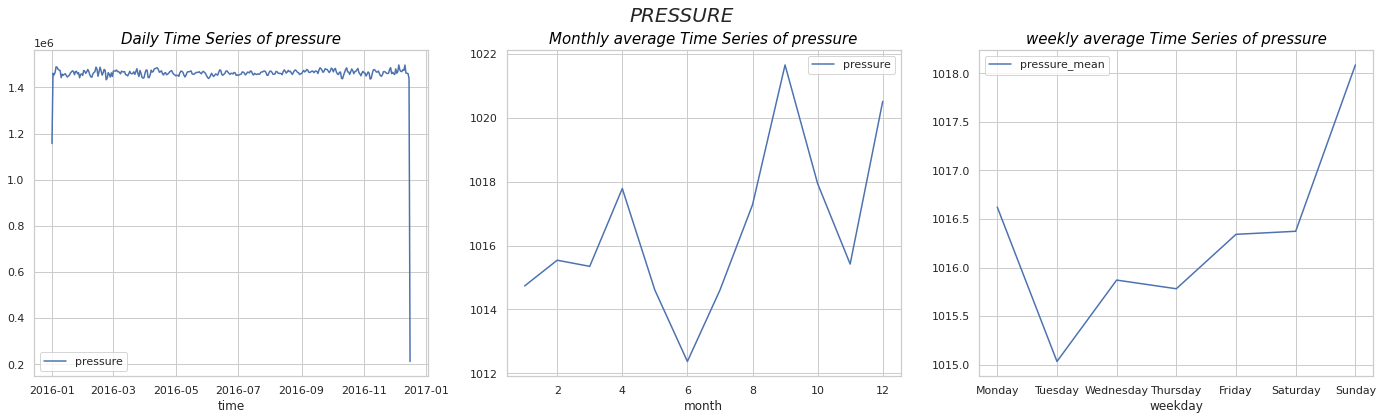

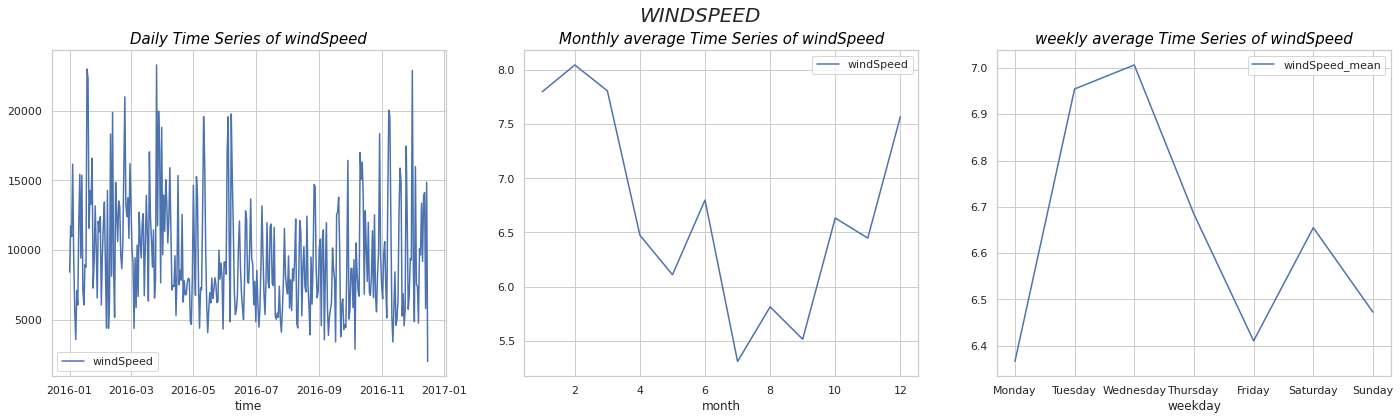

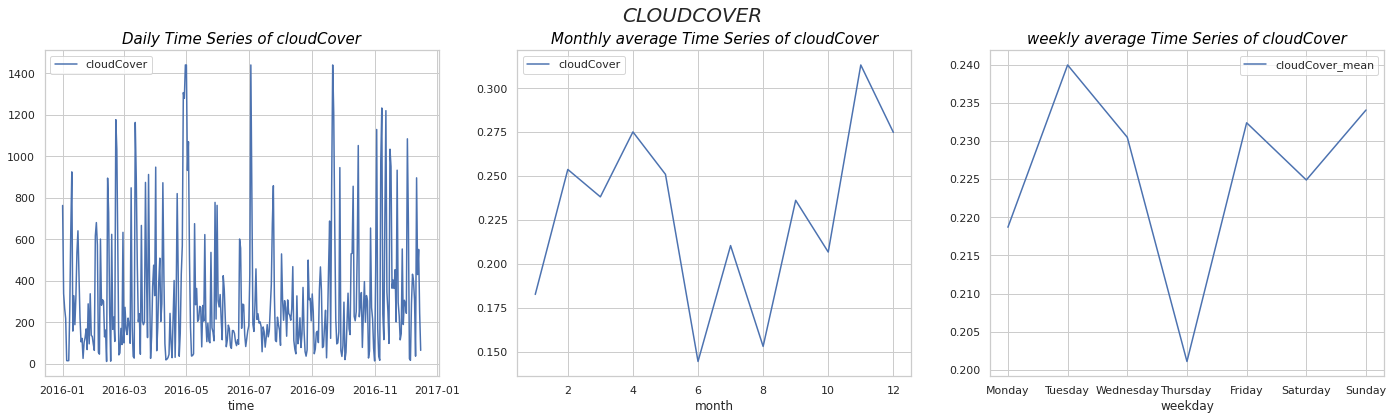

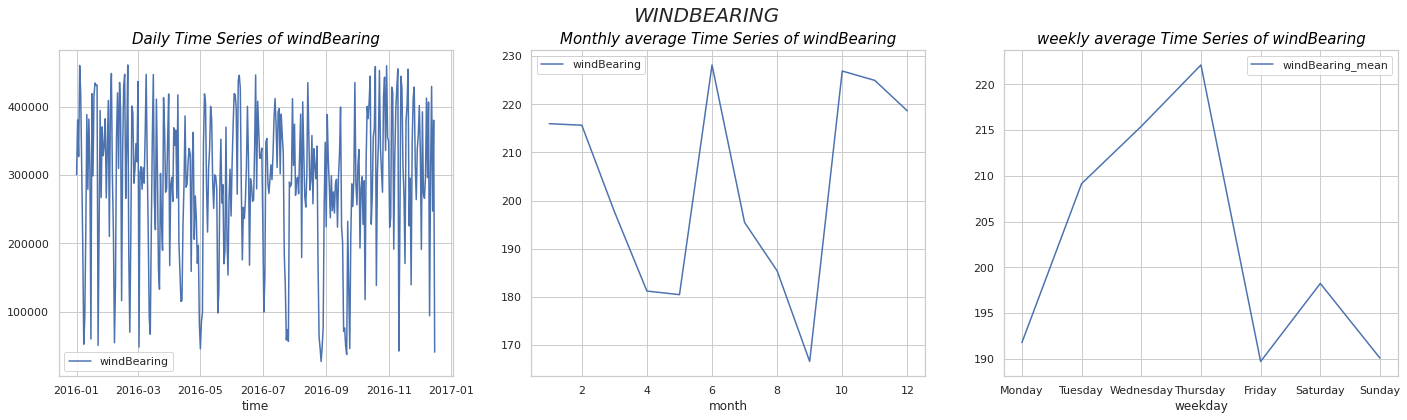

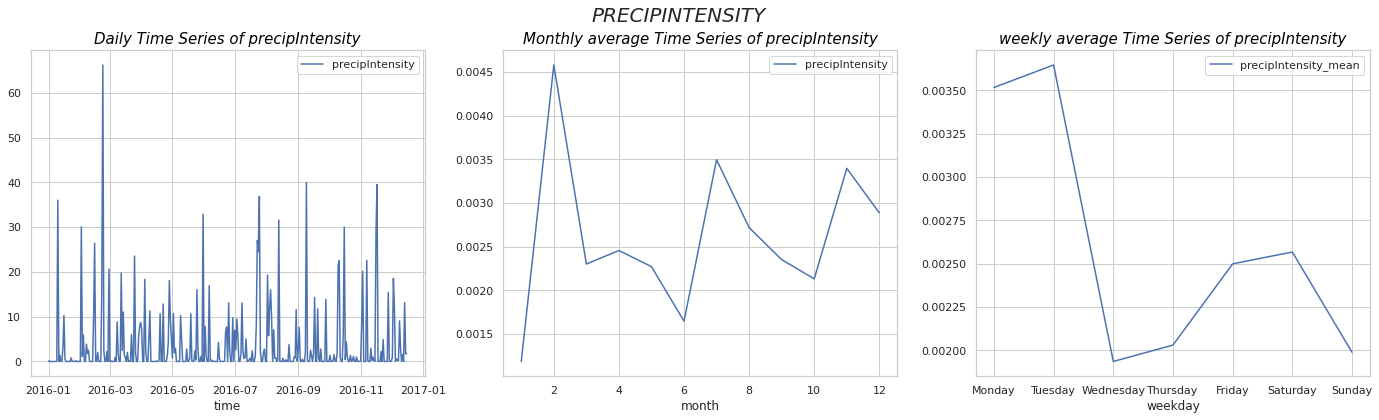

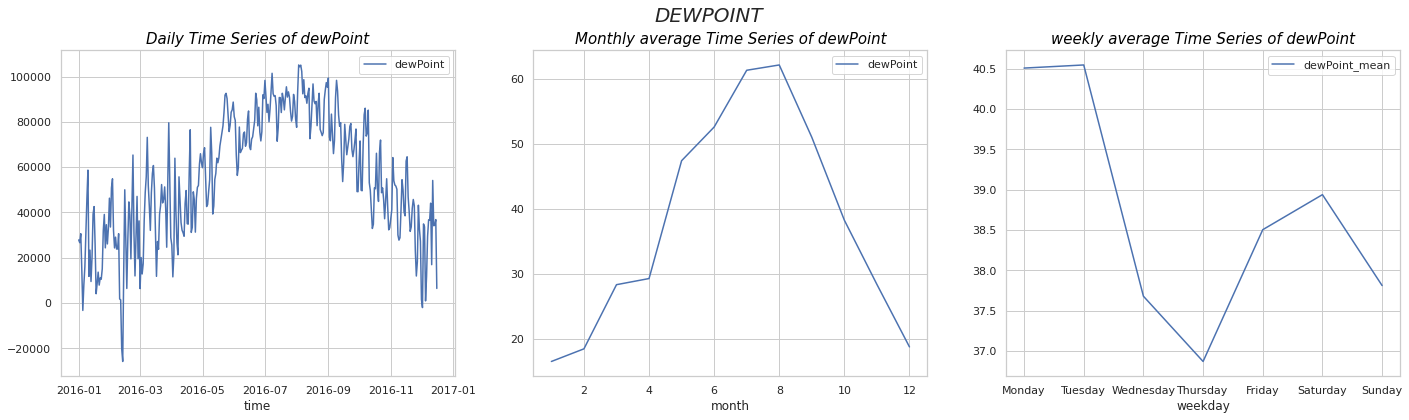

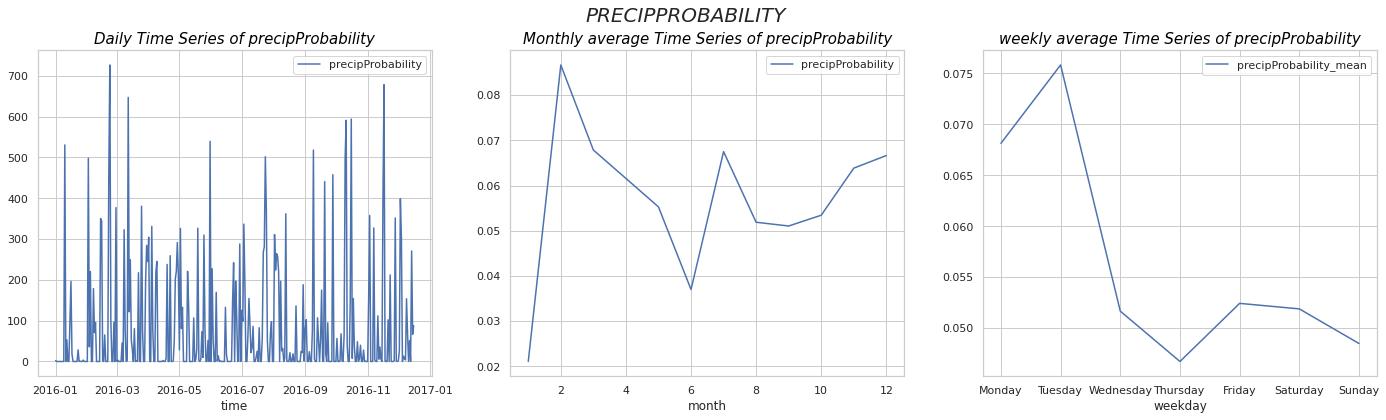

In [ ]:
for i in range(len(weather_para)):
    plot_groupBy(weather_para[i],home)

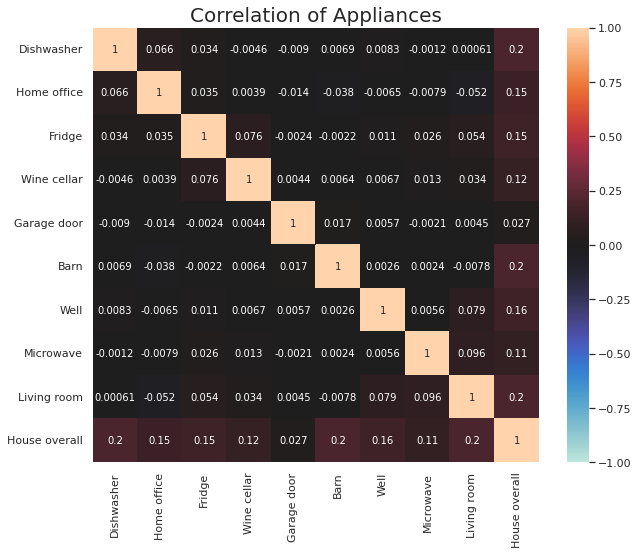

In [ ]:
fig,ax = plt.subplots(figsize=(10, 8)) 
corr = home[Appliances_Area].corr()
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, center=0)
ax.set_title('Correlation of Appliances',size=20)
plt.show()

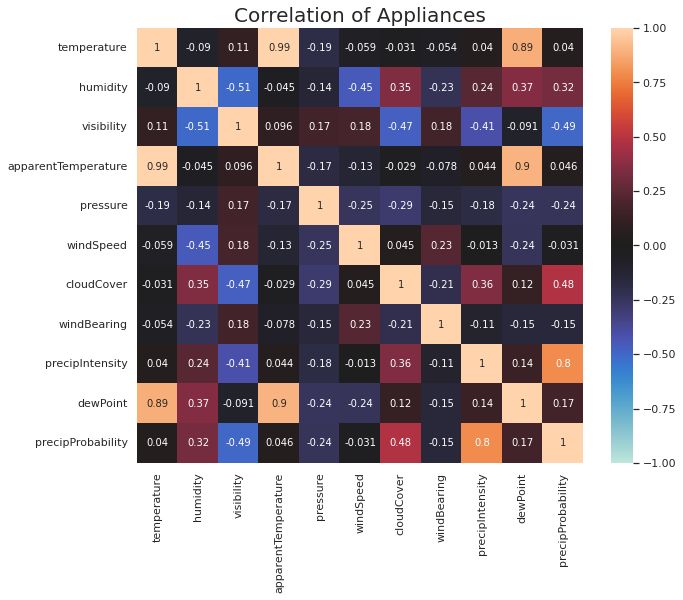

In [ ]:
fig,ax = plt.subplots(figsize=(10, 8)) 
corr = home[weather_para].corr()
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, center=0)
ax.set_title('Correlation of Appliances',size=20)
plt.show()

##### Some weather information is correlated each other.
- **Temperature** is related to apparentTemperature and dewPoint.
- **Humidity** is related to visibility, windSpeed, cloudCover and dewPoint.
- **Visibility** is related to humidity, windSpeed, cloudCover and precipIntensity.
- **CloudCover** is related to humidity, visibility and precipIntensity.
- **PrecipIntensity** is related to visibility and cloudCover.
- **DewPoint** is related to temperature, apparentTemperature and humidity.

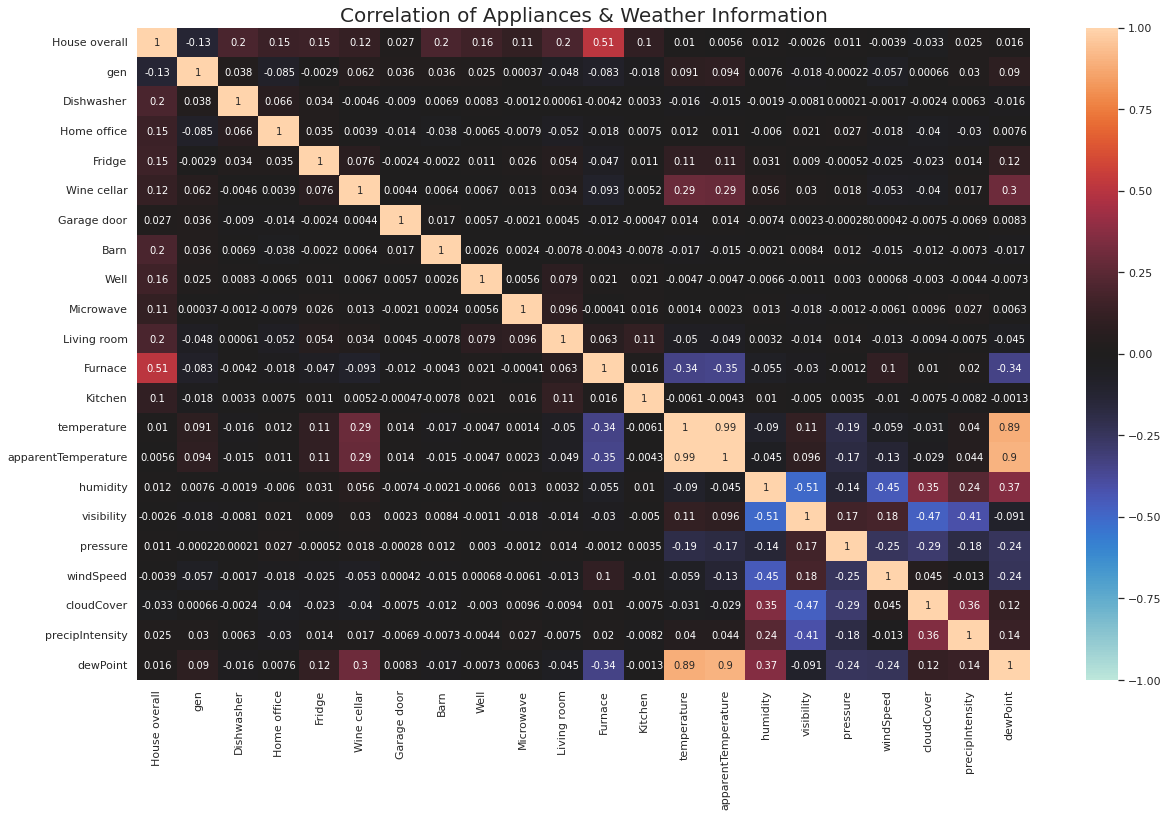

In [ ]:
fig,ax = plt.subplots(figsize=(20, 12)) 
corr = home[['House overall','gen','Dishwasher','Home office','Fridge','Wine cellar','Garage door','Barn','Well','Microwave','Living room','Furnace','Kitchen',\
           'temperature','apparentTemperature','humidity','visibility','pressure','windSpeed','cloudCover','precipIntensity','dewPoint']].corr()
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, center=0)
ax.set_title('Correlation of Appliances & Weather Information',size=20)
plt.show()

##### Some appliances are affected by weather information.
- **Fridge** is related to temperature, apparentTemperature and dewPoint.
- **Wine cellar** is related to temperature, apparentTemperature and dewPoint.
- **Furnace** is related to temperature, apparentTemperature, windSpeed and dewPoint.

# Modeling

#### Modeling can be divided into two parts :-
 - **Case 1** Anamoly/ Change Detection in Appliances
 - **Case 2** Model to prediction Energy Usage from weather parameters or time series modeling

## Case 1 - Anamoly / Change Detection

## Case 2 - Prediction of Energy Usage from weather parameters or time series modeling

In [ ]:
# Now we will use VAR model to predict Energy Consumption for diffrent appliances, House usage and Solar Generation.
# With that we will also use Facbook Prophet model to forecast the same.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import grangercausalitytests, adfuller

In [ ]:
def grangerTestPlot(df,weather_info, applicances, _maxlag):
    grangerTest_df = pd.DataFrame()
    for weather in weather_info:
        for appliance in applicances:
            test_result = grangercausalitytests(df[[appliance, weather]], maxlag=_maxlag, verbose=False)
            p_values = [round(test_result[i][0]['ssr_chi2test'][1],4) for i in range(1, _maxlag+1)]
            min_p_value = np.min(p_values)
            grangerTest_df.loc[appliance, weather] = min_p_value

    fig,ax = plt.subplots(figsize=(10, 8)) 
    sns.heatmap(grangerTest_df, vmax=1, vmin=0, center=1, annot=True)
    ax.set_title('Granger Causality Test Result',size=20)
    plt.xlabel("Weather Information",size=15)
    plt.ylabel("Energy Consumption",size=15)
    plt.show()

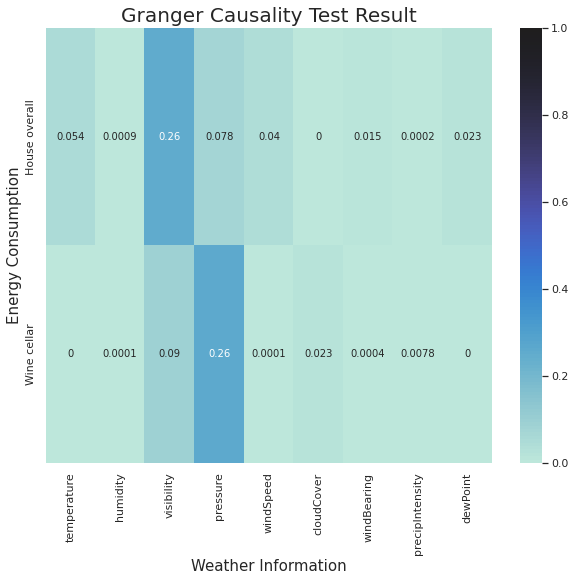

In [ ]:
grangerTestPlot(home,
    weather_info=['temperature', 'humidity', 'visibility', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity','dewPoint'], \
    applicances=['House overall','Wine cellar'],_maxlag=12 )

- Above result helps us that visibility and Pressure won't help us in forecasting House overall and wine cellar energy usage.

In [ ]:
home_1 = home.groupby([pd.Grouper(freq='H', key='time')]).mean().reset_index()

In [ ]:
for i in ['temperature', 'humidity','windSpeed', 'cloudCover', 'windBearing', 'precipIntensity','dewPoint','House overall','Wine cellar']:
    print(f"p-value {i} : {adfuller(home_1[i], autolag='AIC', regression = 'ct')[1]}")

p-value temperature : 0.044948189190761816
p-value humidity : 1.708633417581975e-16
p-value windSpeed : 5.282063043463129e-22
p-value cloudCover : 6.507994763220603e-18
p-value windBearing : 5.792427232680506e-22
p-value precipIntensity : 0.0
p-value dewPoint : 0.0001466501447457289
p-value House overall : 1.60740722677623e-12
p-value Wine cellar : 0.0002828756811808687


- Well all columns are stationary

In [ ]:
home_1.set_index(keys = 'time',drop=True,inplace=True)

In [ ]:
# We will create a function for training a VAR model 
def var_train(var_df,cols=['temperature', 'humidity', 'visibility',  'windSpeed', 'windBearing', 'dewPoint','Furnace', 'House overall'], max_order=10, train_ratio=0.9,test_ratio=0.1):
    #make dataframe for training
    tr,te = [int(len(var_df) * i) for i in [train_ratio, test_ratio]]
    train, test = var_df.iloc[0:tr], var_df.iloc[tr:]

    #model training
    var_func = VAR(train[cols], freq='H')
    var_func.select_order(max_order)
    model = var_func.fit(maxlags=max_order, ic='aic', trend='ctt')
    model_result = model.summary()
    
    #make predict dataframe
    varForecast_df = pd.DataFrame(model.forecast(model.endog, steps=len(test)),columns=['temperature_fr', 'humidity_fr','windSpeed_fr', 'cloudCover_fr', 'windBearing_fr', 'precipIntensity_fr','dewPoint_fr','House overall_fr','Wine cellar_fr'])
    varForecast_df.index = test.index
    
    return varForecast_df, model_result


In [ ]:
from statsmodels.tsa.api import VAR

In [ ]:
# we will select only appliances column and get the dataframe and result
varForecast_df, model_result = var_train(home_1,cols=['temperature', 'humidity','windSpeed', 'cloudCover', 'windBearing', 'precipIntensity','dewPoint','House overall','Wine cellar'], \
                                         max_order=48, train_ratio=0.99,test_ratio=0.01)

In [ ]:
varForecast_df

temperature_fr  humidity_fr  windSpeed_fr  cloudCover_fr  \
time                                                                            
2016-12-12 16:00:00       50.070307     0.797736     12.526498       0.931943   
2016-12-12 17:00:00       50.663666     0.784858     12.447381       0.854821   
2016-12-12 18:00:00       50.826767     0.775778     12.273581       0.777012   
2016-12-12 19:00:00       50.259279     0.781851     12.029679       0.707521   
2016-12-12 20:00:00       48.932312     0.799415     11.625699       0.654915   
...                             ...          ...           ...            ...   
2016-12-15 23:00:00       25.056307     0.848955      5.783219       0.224941   
2016-12-16 00:00:00       24.876461     0.851164      5.791523       0.230277   
2016-12-16 01:00:00       25.041697     0.846271      5.883722       0.235105   
2016-12-16 02:00:00       25.538856     0.834572      6.049581       0.240071   
2016-12-16 03:00:00       26.320400     0.817115      6.272376       0.245296   

                     windBearing_fr  precipIntensity_fr  dewPoint_fr  \
time                                                                   
2016-12-12 16:00:00      233.491000            0.005053    43.851096   
2016-12-12 17:00:00      243.357339            0.008333    44.107848   
2016-12-12 18:00:00      249.558575            0.009264    44.224244   
2016-12-12 19:00:00      257.080407            0.009198    44.376147   
2016-12-12 20:00:00      266.420506            0.009231    44.331916   
...                             ...                 ...          ...   
2016-12-15 23:00:00      227.598928            0.002417    23.177894   
2016-12-16 00:00:00      226.377998            0.002412    23.102402   
2016-12-16 01:00:00      225.483560            0.002413    23.050111   
2016-12-16 02:00:00      225.021171            0.002433    23.013098   
2016-12-16 03:00:00      225.019167            0.002469    22.982503   

                     House overall_fr  Wine cellar_fr  
time                                                   
2016-12-12 16:00:00          1.180020        0.025162  
2016-12-12 17:00:00          1.096226        0.042834  
2016-12-12 18:00:00          1.118577        0.037976  
2016-12-12 19:00:00          1.016566        0.033107  
2016-12-12 20:00:00          1.061604        0.029765  
...                               ...             ...  
2016-12-15 23:00:00          1.021909        0.032120  
2016-12-16 00:00:00          1.022913        0.032212  
2016-12-16 01:00:00          1.026672        0.032333  
2016-12-16 02:00:00          1.032195        0.032435  
2016-12-16 03:00:00          1.038685        0.032414  

[84 rows x 9 columns]

In [ ]:
cols=['temperature', 'humidity','windSpeed', 'cloudCover', 'windBearing', 'precipIntensity','dewPoint','House overall','Wine cellar']

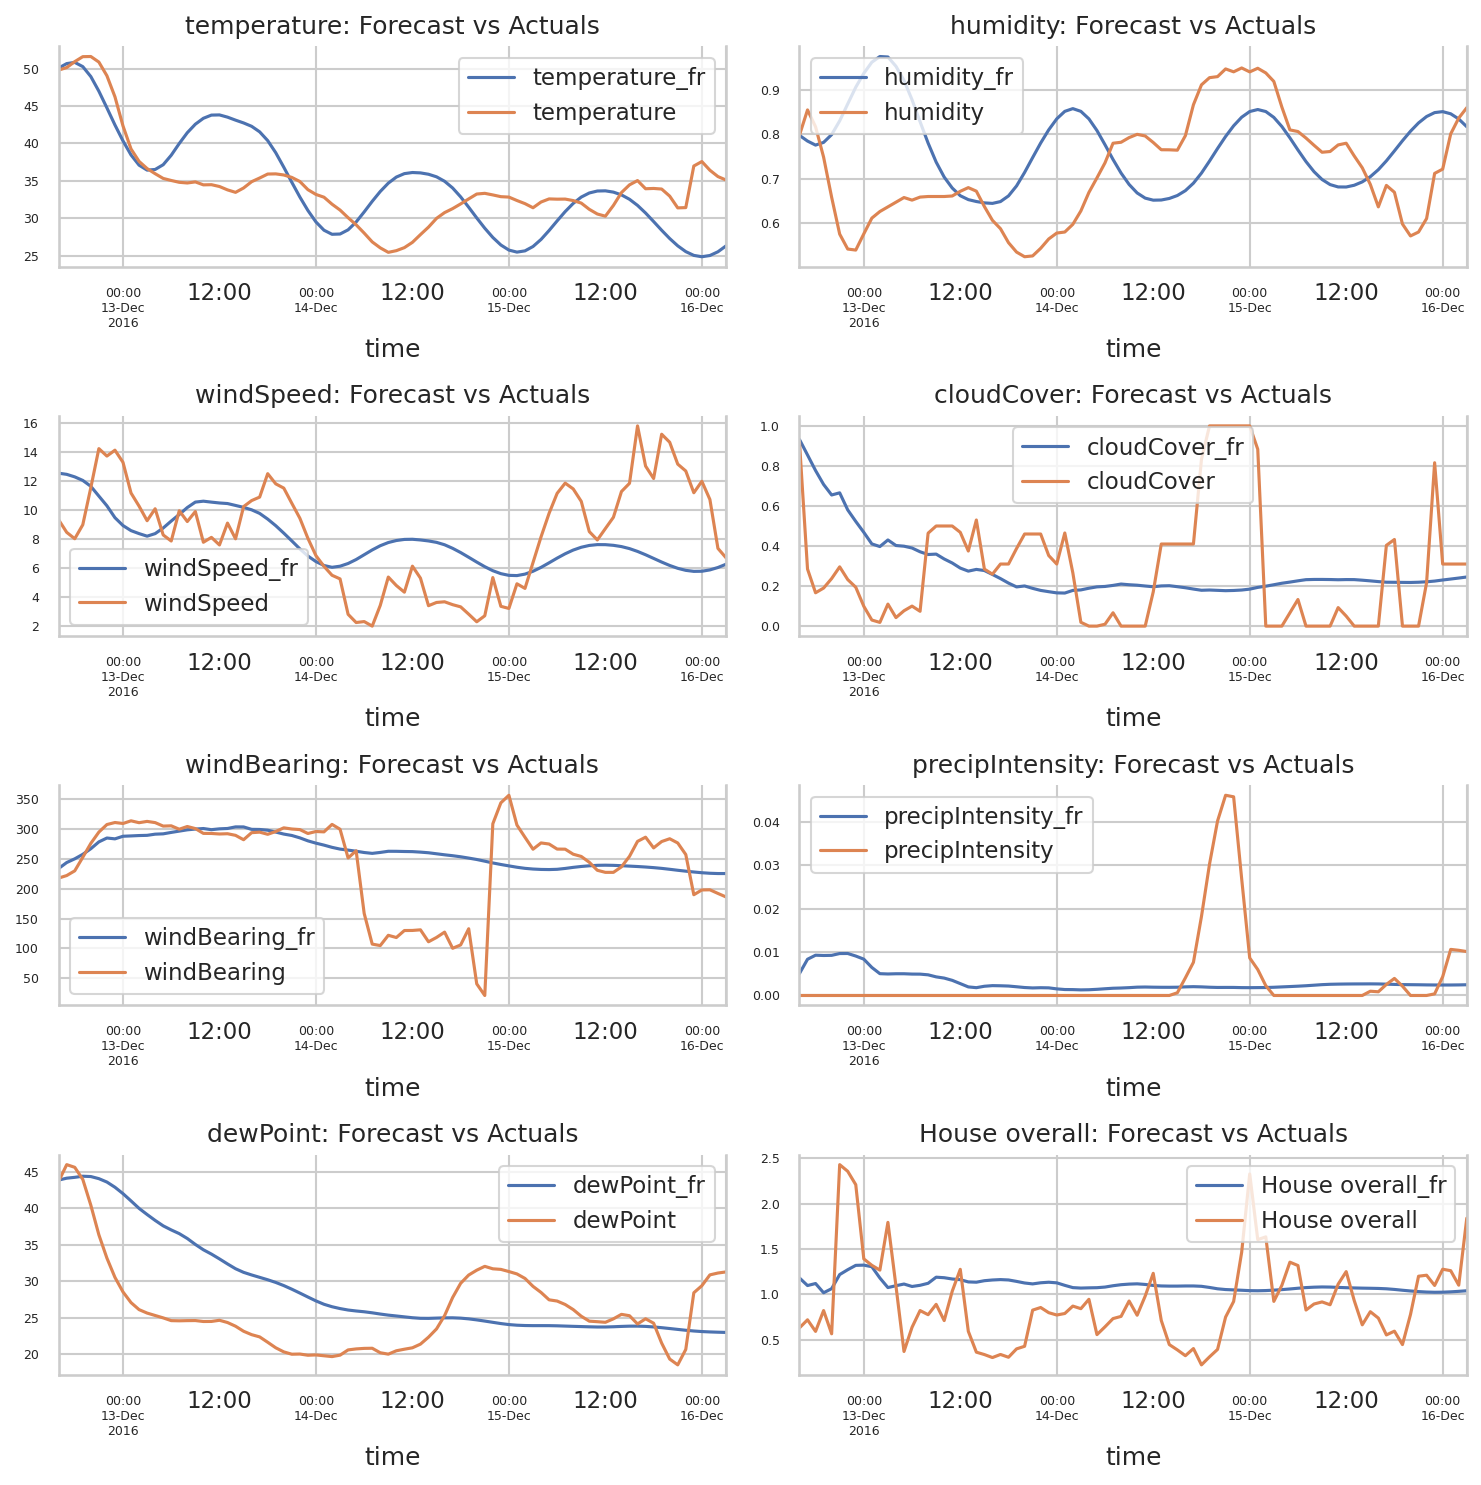

In [ ]:
# plot forecast vs. actuals
fig, axes = plt.subplots(nrows=int(len(varForecast_df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(cols, axes.flatten())):
    varForecast_df[col+'_fr'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    home_1[col][8315:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [ ]:
# From Above Figure we can clearly see that Forecasting with this are not much accurate so, need to tune the model and Apply some other models too